In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib import cm
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3
from matplotlib_venn import venn2_unweighted, venn3_unweighted 
import matplotlib.image as mpimg
from venn import venn
import seaborn as sns
import numpy as np
import random
import statistics as stats
import scipy.interpolate
from scipy.ndimage.filters import gaussian_filter1d
import math
plt.rcParams['figure.figsize']= 8,4
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

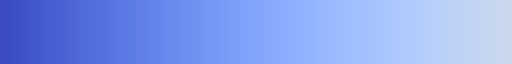

In [3]:
blues_cm = matplotlib.colors.LinearSegmentedColormap.from_list(
    'blue_coolwarm', cm.coolwarm(np.linspace(0, 0.44, 256))
)
blues_cm

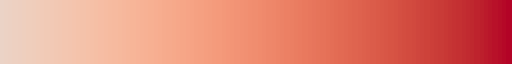

In [4]:
reds_cm = matplotlib.colors.LinearSegmentedColormap.from_list(
    'red_coolwarm', cm.coolwarm(np.linspace(0.56, 1.0, 256))
)
reds_cm

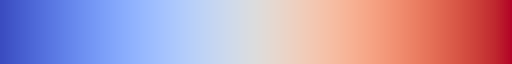

In [5]:
cm.coolwarm

In [6]:
df=pd.read_csv("samtools.flagstats.tsv", sep='\t')
df["reads_numb"]=df["read1"]+df["read2"]
LIBR=pd.read_csv("libraries.txt", sep='\t')
df=LIBR[["IND"]].merge(df,left_on="IND",right_on="sample_prefix")
df=df.drop(columns=['IND'])
df["LIBRARY"]=LIBR["LIBRARY"]
df=df.sort_values(by='sample_prefix')
df=df.reset_index(drop=True)
df

,sample_prefix,pop,total,secondary,supplementary,duplicates,mapped,mapped.perc,paired,read1,read2,properly_paired,properly_paired.perc,both_mapped,singletons,singletons.perc,different_chr,different_chr_mapQ>=5,reads_numb,LIBRARY
0,01b_01,01b,110765,0,3231,0,109183,98.57,107534,53767,53767,100182,93.16,105328,624,0.58,4496,3705,107534,Library2
1,01b_02,01b,3644971,0,93627,0,3607519,98.97,3551344,1775672,1775672,3409068,95.99,3504878,9014,0.25,75820,50009,3551344,Library2
2,01b_03,01b,1624728,0,50446,0,1610142,99.10,1574282,787141,787141,1498786,95.20,1554904,4792,0.30,45564,35392,1574282,Library2
3,01b_04,01b,28956,0,1150,0,28361,97.95,27806,13903,13903,24962,89.77,27022,189,0.68,1966,1721,27806,Library2
4,01b_05,01b,2186608,0,66974,0,2163356,98.94,2119634,1059817,1059817,2010600,94.86,2089286,7096,0.33,64664,48893,2119634,Library2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1368,27b_40,27b,1352869,0,19113,0,1342585,99.24,1333756,666878,666878,1303206,97.71,1322318,1154,0.09,16214,13280,1333756,Library4
1369,27b_42,27b,343343,0,3433,0,339483,98.88,339910,169955,169955,332916,97.94,335652,398,0.12,2446,1893,339910,Library4
1370,27b_43,27b,393809,0,6297,0,391342,99.37,387512,193756,193756,377248,97.35,384666,379,0.10,7032,5554,387512,Library4
1371,27b_48,27b,727075,0,13277,0,720514,99.10,713798,356899,356899,690478,96.73,706458,779,0.11,14856,12575,713798,Library4


In [7]:
# Supplementary figure 2.1

In [8]:
popmap=pd.read_csv("popmap.filt0.tsv", sep='\t')
POP=np.unique(popmap["pop"])
goodqual=[48,0,47,48,46,48,23,10,6,0,0,0,0,40,48,10,1,0,44,25,0,47,43,43,24,9,0,5,41,40,49,22]
medqual=[0,13,0,0,48,0,25,6,44,33,52,43,46,6,0,19,49,50,6,21,37,0,2,2,16,7,47,35,0,0,0,0]
badqual=[0]*32
d = {'POP': POP, 'Good': goodqual, 'Medium': medqual, 'Poor': badqual}
dnaqual = pd.DataFrame(data=d)
dnaqual

,POP,Good,Medium,Poor
0,01b,48,0,0
1,04b,0,13,0
2,05abc,47,0,0
3,06a,48,0,0
4,06c,46,48,0
5,07a,48,0,0
6,08ab,23,25,0
7,09a,10,6,0
8,09b,6,44,0
9,10a,0,33,0


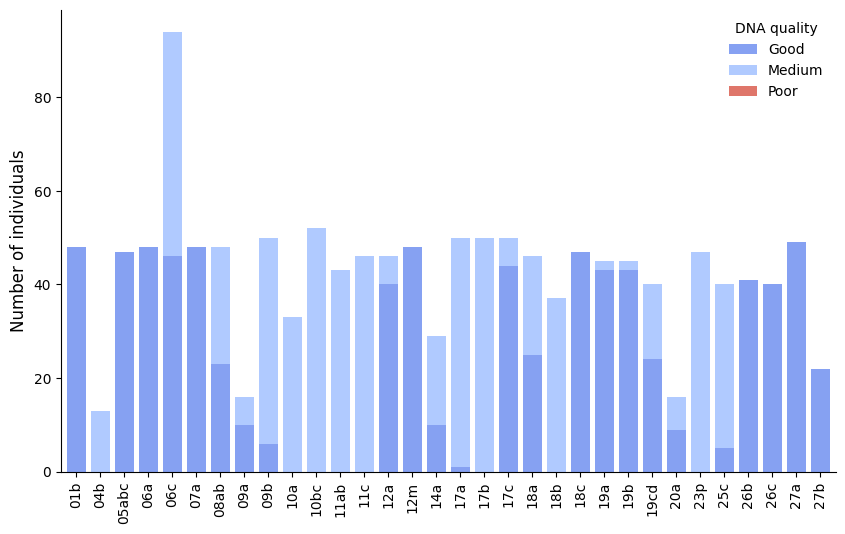

In [9]:
cmap = reds_cm
mypal = [cmap(i / (18 - 1)) for i in range(18)]
RED=mypal[13]
cmap = blues_cm
mypal = [cmap(i / (4 - 1)) for i in range(4)]
mypal = [mypal[1], mypal[2], RED]
fig,ax=plt.subplots()
fig.set_size_inches(10,6)
dnaqual.plot(kind='bar', x="POP", stacked=True, width=0.8, alpha=0.8, color=mypal, ax=ax)
ax.set_xlabel("",size=12)
#ax.set_xticklabels(XTICKLAB)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel('Number of individuals',size=12)
ax.legend(title="DNA quality", frameon=False)
fig.savefig("SuppFig2.1.pdf", format="pdf")
fig.savefig("SuppFig2.1.png", format="png", dpi=500)

In [10]:
# Supplementary Figure 2.2

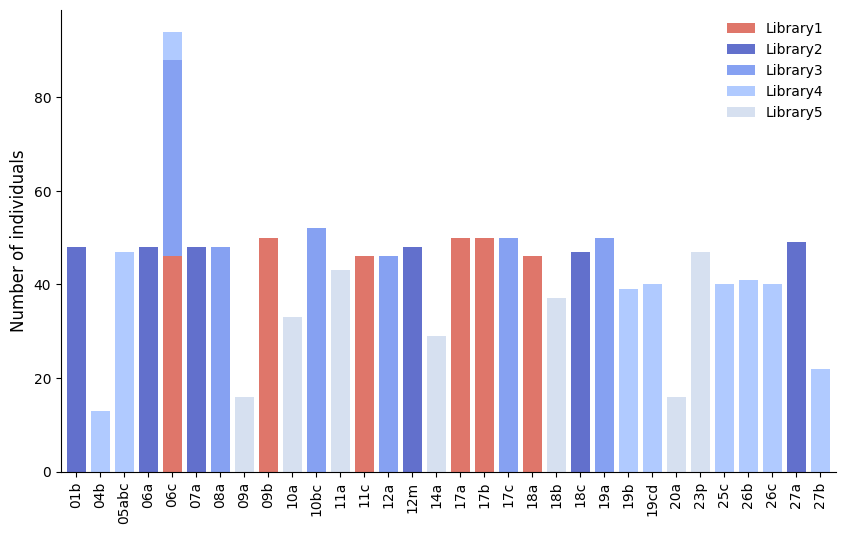

In [11]:
data_grouped = LIBR.groupby(['SITE', 'LIBRARY']).size().unstack(fill_value=0)

cmap = blues_cm
mypal = [cmap(i / (4 - 1)) for i in range(4)]
LIBPAL = [RED, mypal[0], mypal[1], mypal[2], mypal[3]]
fig,ax=plt.subplots()
fig.set_size_inches(10,6)
data_grouped.plot(kind='bar', stacked=True, width=0.8, alpha=0.8, color=LIBPAL, ax=ax)
ax.set_xlabel("",size=12)
#ax.set_xticklabels(XTICKLAB)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel('Number of individuals',size=12)
ax.legend(title="", frameon=False)
fig.savefig("SuppFig2.2.pdf", format="pdf")
fig.savefig("SuppFig2.2.png", format="png", dpi=500)

In [12]:
#Supplementary Figure 3.1

In [13]:
df=pd.read_csv("samtools.flagstats.tsv", sep='\t')
df["reads_numb"]=df["read1"]+df["read2"]
LIBR=pd.read_csv("libraries.txt", sep='\t')
df=LIBR[["IND"]].merge(df,left_on="IND",right_on="sample_prefix")
df=df.drop(columns=['IND'])
df["LIBRARY"]=LIBR["LIBRARY"]
df=df.sort_values(by='sample_prefix')
df=df.reset_index(drop=True)
df

,sample_prefix,pop,total,secondary,supplementary,duplicates,mapped,mapped.perc,paired,read1,read2,properly_paired,properly_paired.perc,both_mapped,singletons,singletons.perc,different_chr,different_chr_mapQ>=5,reads_numb,LIBRARY
0,01b_01,01b,110765,0,3231,0,109183,98.57,107534,53767,53767,100182,93.16,105328,624,0.58,4496,3705,107534,Library2
1,01b_02,01b,3644971,0,93627,0,3607519,98.97,3551344,1775672,1775672,3409068,95.99,3504878,9014,0.25,75820,50009,3551344,Library2
2,01b_03,01b,1624728,0,50446,0,1610142,99.10,1574282,787141,787141,1498786,95.20,1554904,4792,0.30,45564,35392,1574282,Library2
3,01b_04,01b,28956,0,1150,0,28361,97.95,27806,13903,13903,24962,89.77,27022,189,0.68,1966,1721,27806,Library2
4,01b_05,01b,2186608,0,66974,0,2163356,98.94,2119634,1059817,1059817,2010600,94.86,2089286,7096,0.33,64664,48893,2119634,Library2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1368,27b_40,27b,1352869,0,19113,0,1342585,99.24,1333756,666878,666878,1303206,97.71,1322318,1154,0.09,16214,13280,1333756,Library4
1369,27b_42,27b,343343,0,3433,0,339483,98.88,339910,169955,169955,332916,97.94,335652,398,0.12,2446,1893,339910,Library4
1370,27b_43,27b,393809,0,6297,0,391342,99.37,387512,193756,193756,377248,97.35,384666,379,0.10,7032,5554,387512,Library4
1371,27b_48,27b,727075,0,13277,0,720514,99.10,713798,356899,356899,690478,96.73,706458,779,0.11,14856,12575,713798,Library4


In [14]:
print(np.mean(df["reads_numb"]))

2160404.9002185


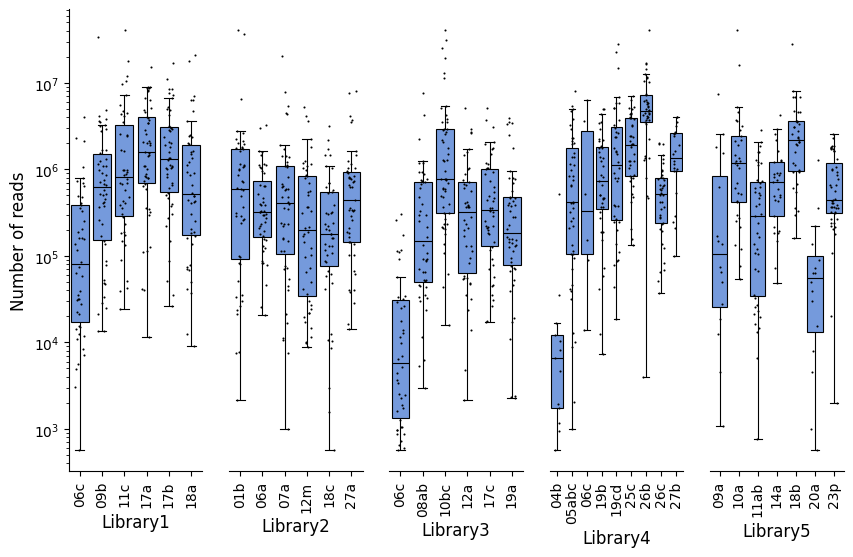

In [15]:
cmap = plt.get_cmap('Blues')
mypal = [cmap(i / (18 - 1)) for i in range(18)]

# Setup figure and axes
fig, ax = plt.subplots(1, 5, sharey=False)
fig.set_size_inches(10, 6)

for counter, library in enumerate(["Library1", "Library2", "Library3", "Library4", "Library5"]):
    tmp = df[df["LIBRARY"] == library]
    sns.boxplot(data=tmp, x="pop", y="reads_numb", color="cornflowerblue", linecolor="black", linewidth=0.8, showfliers=False, ax=ax[counter])
    sns.stripplot(data=tmp, x="pop", y="reads_numb", color="black", jitter=0.2, size=1.5, ax=ax[counter])
    ax[counter].set_yscale("log")
    ax[counter].set_xlabel(library, size=12)
    if counter == 0:
        ax[counter].set_ylabel('Number of reads', size=12)
    else:
        ax[counter].set_ylabel('')  # Clear y-label for other subplots
        ax[counter].yaxis.set_visible(False)
        ax[counter].spines['left'].set_visible(False)

    ax[counter].tick_params(axis='x', rotation=90)
    ax[counter].spines['top'].set_visible(False)
    ax[counter].spines['right'].set_visible(False)

fig.savefig("SuppFig3.1.pdf", format="pdf")
fig.savefig("SuppFig3.1.png", format="png", dpi=500)

In [16]:
# Supplementary Figure 3.2

In [17]:
print(np.mean(df["mapped"]))
print(np.mean(df["mapped.perc"]))

2149808.713765477
93.78402767662054


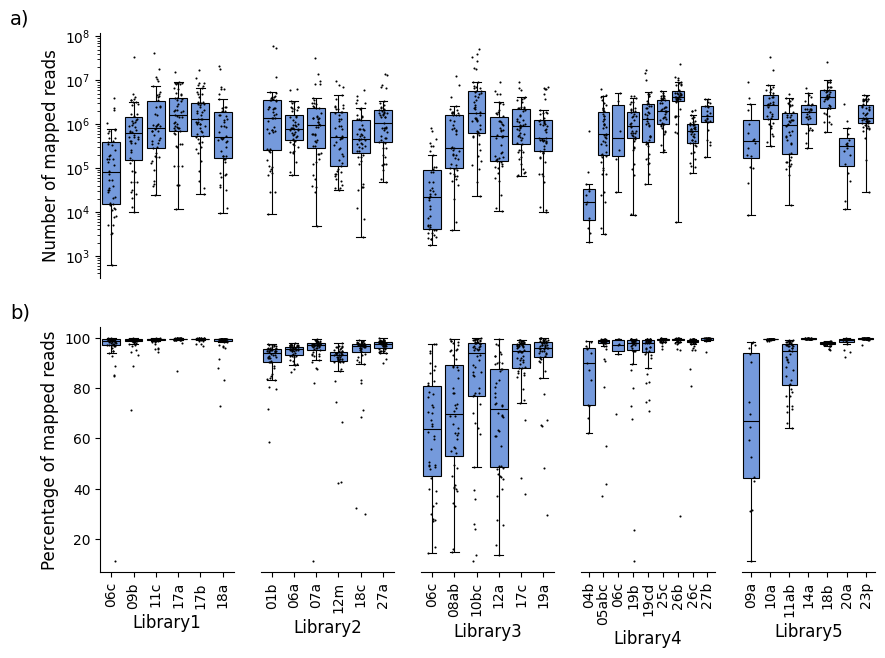

In [18]:
cmap = plt.get_cmap('Blues')
mypal = [cmap(i / (18 - 1)) for i in range(18)]

# Setup figure and axes
fig, ax = plt.subplots(2, 5, sharey=False)
fig.set_size_inches(10, 7)

for counter, library in enumerate(["Library1", "Library2", "Library3", "Library4", "Library5"]):
    tmp = df[df["LIBRARY"] == library]
    sns.boxplot(data=tmp, x="pop", y="mapped", color="cornflowerblue", linecolor="black", linewidth=0.8, showfliers=False, ax=ax[0,counter])
    sns.stripplot(data=tmp, x="pop", y="mapped", color="black", jitter=0.2, size=1.5, ax=ax[0,counter])
    ax[0,counter].set_yscale("log")
    ax[0,counter].set_ylim(min(df["mapped"])/2, max(df["mapped"])*2)
    ax[0,counter].set_xlabel("", size=12)
    ax[0,counter].xaxis.set_visible(False)
    if counter == 0:
        ax[0,counter].set_ylabel('Number of mapped reads', size=12)
        ax[0,counter].set_title("a)", x=-0.6, size=14)
    else:
        ax[0,counter].set_xlabel('')  # Clear y-label for other subplots
        ax[0,counter].xaxis.set_visible(False)
        ax[0,counter].set_ylabel('')  # Clear y-label for other subplots
        ax[0,counter].yaxis.set_visible(False)
        ax[0,counter].spines['left'].set_visible(False)
    ax[0,counter].spines['top'].set_visible(False)
    ax[0,counter].spines['right'].set_visible(False)
    ax[0,counter].spines['bottom'].set_visible(False)

for counter, library in enumerate(["Library1", "Library2", "Library3", "Library4", "Library5"]):
    tmp = df[df["LIBRARY"] == library]
    sns.boxplot(data=tmp, x="pop", y="mapped.perc", color="cornflowerblue", linecolor="black", linewidth=0.8, showfliers=False, ax=ax[1,counter])
    sns.stripplot(data=tmp, x="pop", y="mapped.perc", color="black", jitter=0.2, size=1.5, ax=ax[1,counter])
    ax[1,counter].set_xlabel(library, size=12)
    if counter == 0:
        ax[1,counter].set_ylabel('Percentage of mapped reads', size=12)
        ax[1,counter].set_title("b)", x=-0.6, size=14)
    else:
        ax[1,counter].set_ylabel('')  # Clear y-label for other subplots
        ax[1,counter].yaxis.set_visible(False)
        ax[1,counter].spines['left'].set_visible(False)
    ax[1,counter].tick_params(axis='x', rotation=90)
    ax[1,counter].spines['top'].set_visible(False)
    ax[1,counter].spines['right'].set_visible(False)

fig.savefig("SuppFig3.2.pdf", format="pdf")
fig.savefig("SuppFig3.2.png", format="png", dpi=500)

In [19]:
# Supplementary Figure 3.3

In [20]:
DEPTH=pd.read_csv("depth.tsv", sep='\t')
DEPTH["POP"]="00"
for i in range(0,len(DEPTH)):
    DEPTH["POP"][i]=DEPTH["SAMPLE"][i].split("_")[0]
DEPTH

,SAMPLE,MEAN,QUART1,MEDIAN,QUART3,SD,POP
0,01b_01,20.9819,1,6,30,31.1815,01b
1,01b_02,248.8220,1,35,371,440.0900,01b
2,01b_03,139.3460,2,52,204,224.3850,01b
3,01b_04,10.1220,1,2,14,17.8542,01b
4,01b_05,161.8880,2,40,252,266.7270,01b
...,...,...,...,...,...,...,...
1368,27b_40,168.9860,4,88,252,224.3620,27b
1369,27b_42,73.5637,7,48,102,87.2660,27b
1370,27b_43,77.0326,11,50,108,88.0827,27b
1371,27b_48,115.2220,5,61,158,155.7720,27b


In [21]:
print(len(DEPTH[DEPTH["MEDIAN"]<=10]))
print(len(DEPTH[DEPTH["MEDIAN"]>=100]))

305
206


In [22]:
DEPTH=LIBR[["IND"]].merge(DEPTH,left_on="IND",right_on="SAMPLE")
DEPTH=DEPTH.drop(columns=['IND'])
DEPTH["LIBRARY"]=LIBR["LIBRARY"]
DEPTH=DEPTH.sort_values(by='SAMPLE')
DEPTH=DEPTH.reset_index(drop=True)
DEPTH_BYLIBR=DEPTH.sort_values("LIBRARY")
DEPTH_BYLIBR

,SAMPLE,MEAN,QUART1,MEDIAN,QUART3,SD,POP,LIBRARY
576,11c_41,33.7266,1,2,6,79.7323,11c,Library1
758,17a_50,408.4510,1,124,554,642.4320,17a,Library1
757,17a_49,94.9336,1,21,157,124.0960,17a,Library1
756,17a_48,113.3420,2,94,164,128.4430,17a,Library1
755,17a_47,623.3150,1,154,833,1007.8200,17a,Library1
...,...,...,...,...,...,...,...,...
1176,23p_93,146.6510,4,49,177,270.4660,23p,Library5
1175,23p_92,114.6420,10,48,152,179.9920,23p,Library5
1174,23p_91,119.1700,7,47,144,220.6640,23p,Library5
524,11ab_32,126.1770,4,50,174,196.9130,11ab,Library5


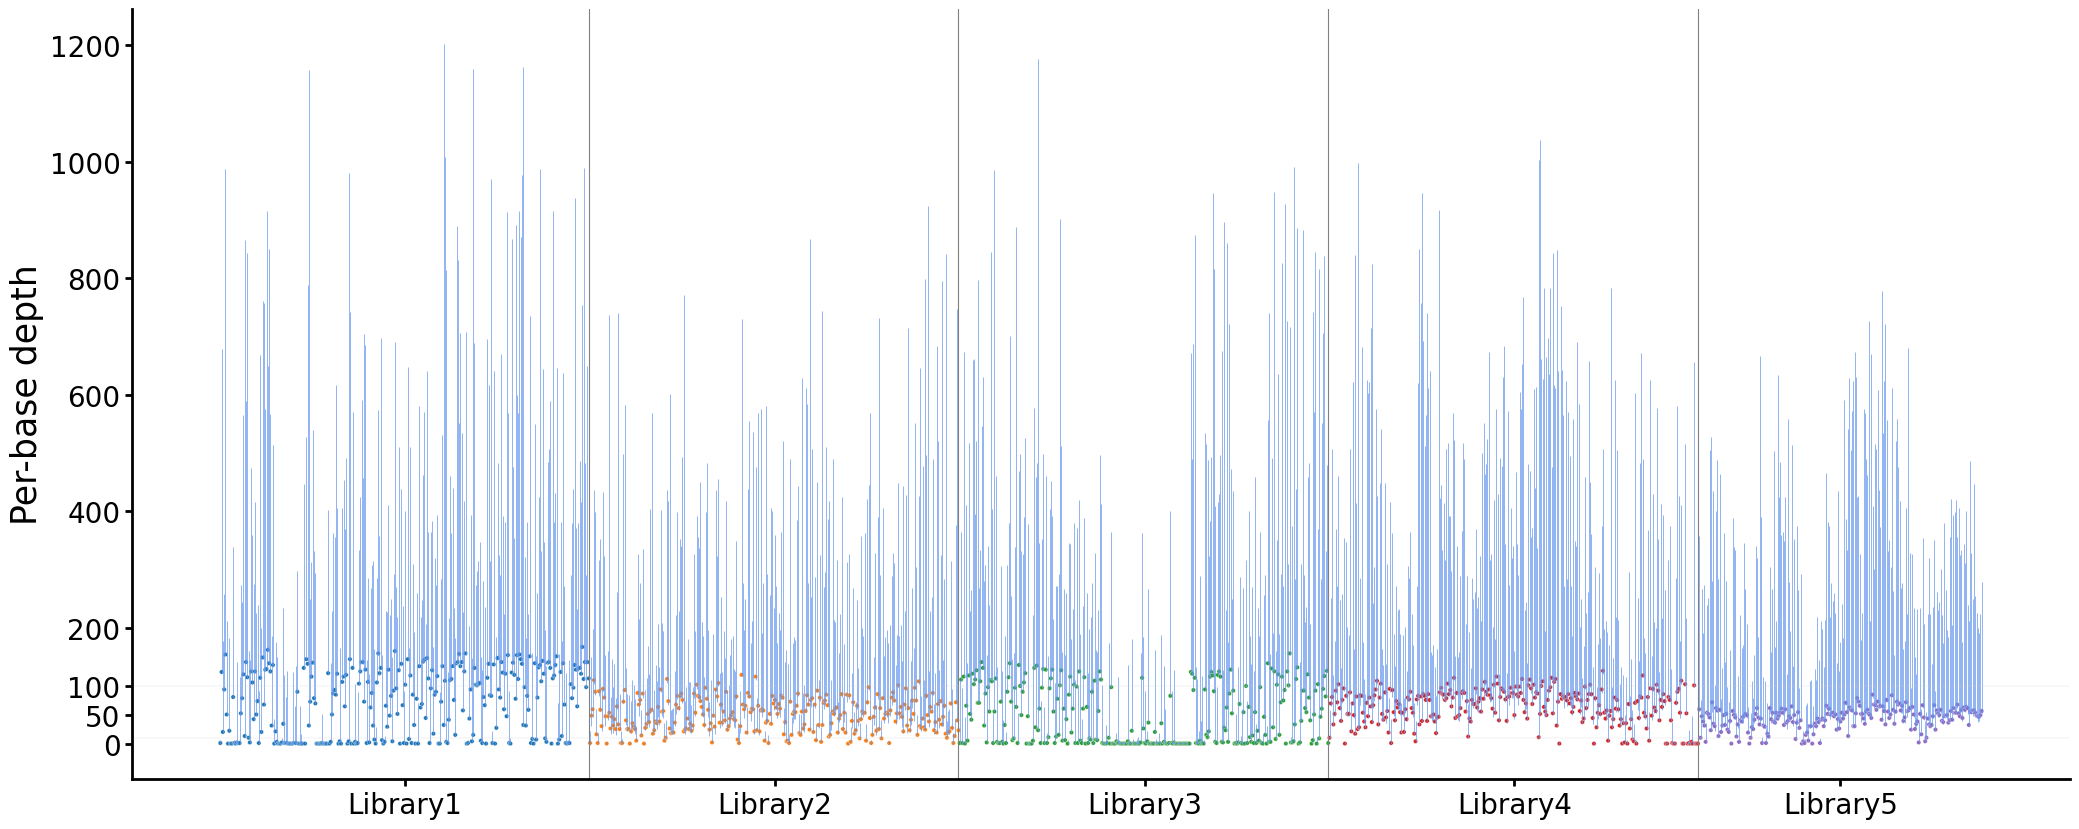

In [23]:
LIBRARY=np.unique(DEPTH_BYLIBR["LIBRARY"])
fig, ax = plt.subplots()
fig.set_size_inches(25, 10)
sns.scatterplot(data=DEPTH_BYLIBR, x="SAMPLE", y="MEDIAN", hue="LIBRARY", color="cornflowerblue", s=10, ax=ax)

for counter, library in enumerate(["Library1", "Library2", "Library3", "Library4", "Library5"]):
    tmp = DEPTH_BYLIBR[DEPTH_BYLIBR.LIBRARY == library]
    ax.errorbar(tmp["SAMPLE"], tmp["MEDIAN"], yerr=[tmp["QUART1"], tmp["QUART3"]], fmt="none", elinewidth=0.5, ecolor="cornflowerblue")

vline_pos = [DEPTH_BYLIBR.loc[DEPTH_BYLIBR['SAMPLE'] == DEPTH_BYLIBR['SAMPLE'].iloc[-1], 'SAMPLE'].values[0]]
xtick_pos = [DEPTH_BYLIBR['SAMPLE'].iloc[len(DEPTH_BYLIBR)//2]]

for i in LIBRARY:
    tmp = DEPTH_BYLIBR[DEPTH_BYLIBR.LIBRARY == i]
    vline_pos.append(tmp['SAMPLE'].iloc[-1])
    xtick_pos.append(tmp['SAMPLE'].iloc[len(tmp)//2])

vline_pos = vline_pos[1:-1]  # Adjust as needed
xtick_pos = xtick_pos[1:]

for pos in vline_pos:
    ax.axvline(x=pos, color='gray', linestyle='-', linewidth=0.8, alpha=1.0)

xtick_labels = LIBRARY  # Assuming you want to use LIBRARY as labels
plt.xticks(ticks=xtick_pos, labels=xtick_labels, fontsize=20, rotation=0)

ax.axhline(y=10, color='lightgray', linestyle='-', linewidth=0.2)
ax.axhline(y=100, color='lightgray', linestyle='-', linewidth=0.2)

ytick = [0, 50, 100, 200, 400, 600, 800, 1000, 1200]
plt.yticks(ytick, fontsize=20)

plt.legend([], [], frameon=False)
ax.set_ylabel('Per-base depth', size=25)
ax.set_xlabel('', size=20)
ax.tick_params(axis='both', which='major', length=5, width=2)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
fig.savefig("SuppFig3.3.pdf", format="pdf")
fig.savefig("SuppFig3.3.png", format="png", dpi=600)

In [24]:
# Supplementary figure 4.1

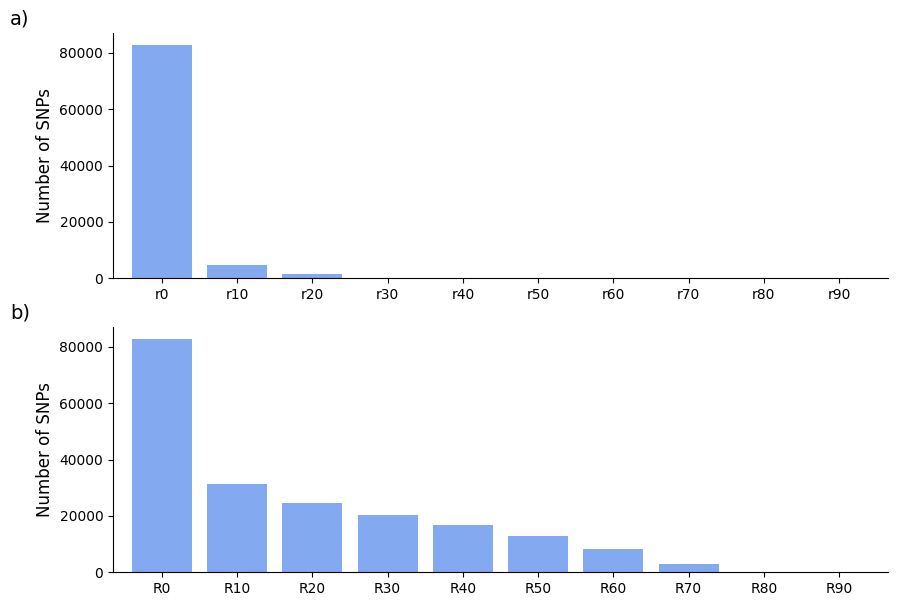

In [25]:
fig,ax=plt.subplots(2,1)
fig.set_size_inches(10,7)
FILT=["r0","r10","r20","r30","r40","r50","r60","r70","r80","r90"]
SNPNUMB=[82824,4854,1416,259,19,0,0,0,0,0]
d={"FILT":FILT, "SNPNUMB":SNPNUMB}
ds=pd.DataFrame(d)
ds.plot(x="FILT",y="SNPNUMB",kind='bar', width=0.8, alpha=0.8, color="cornflowerblue", legend=False,ax=ax[0])
ax[0].set_ylabel('Number of SNPs',size=12)
ax[0].set_xlabel('',size=12)
ax[0].tick_params(axis='x', rotation=0)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].set_title("a)", x=-0.12, size=14)

FILT=["R0","R10","R20","R30","R40","R50","R60","R70","R80","R90"]
SNPNUMB=[82824,31335,24531,20316,16651,12832,8228,3112,237,0]
d={"FILT":FILT, "SNPNUMB":SNPNUMB}
ds=pd.DataFrame(d)
ds.plot(x="FILT",y="SNPNUMB",kind='bar', width=0.8, alpha=0.8, color="cornflowerblue", legend=False,ax=ax[1])
ax[1].set_ylabel('Number of SNPs',size=12)
ax[1].set_xlabel('',size=12)
ax[1].tick_params(axis='x', rotation=0)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].set_title("b)", x=-0.12, size=14)

fig.savefig("SuppFig4.1.pdf", format="pdf")
fig.savefig("SuppFig4.1.png", format="png", dpi=500)

In [26]:
# Supplementary Figure 4.2

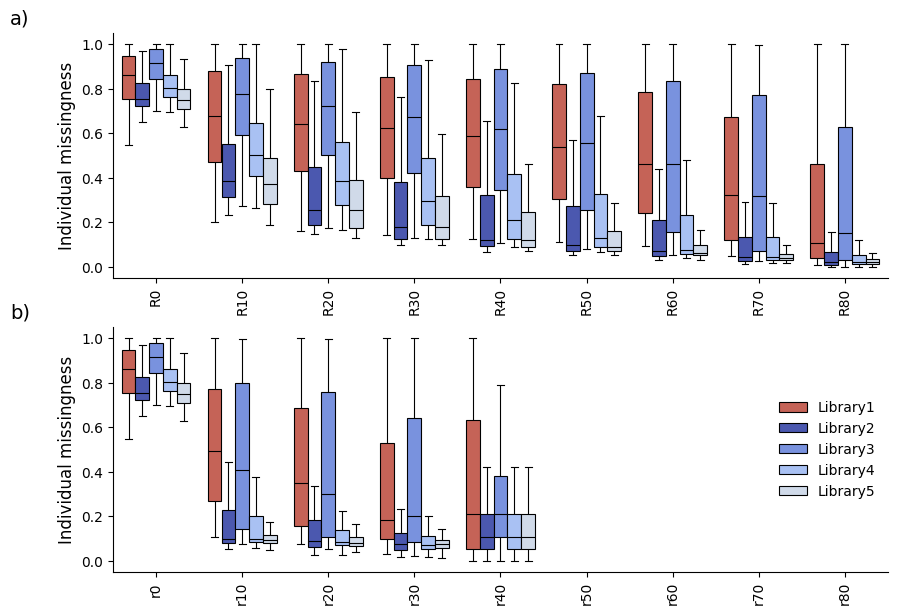

In [27]:
fig, ax = plt.subplots(2, 1)
fig.set_size_inches(10, 7)

indices = ["R0", "R10", "R20", "R30", "R40", "R50", "R60", "R70", "R80"]
filt0_imiss = pd.DataFrame()
for R in indices:
    filename = f"filt0.{R}.imiss"
    ds = pd.read_csv(filename, sep='\t')
    ds=ds[["INDV","F_MISS"]]
    ds=LIBR[["IND"]].merge(ds,left_on="IND",right_on="INDV")
    ds=ds.drop(columns=['IND'])
    ds["LIBRARY"]=LIBR["LIBRARY"]
    ds["R"]=R
    ds=ds.sort_values(by='LIBRARY')
    ds=ds.reset_index(drop=True)
    filt0_imiss = pd.concat([filt0_imiss, ds], ignore_index=True)
sns.boxplot(data=filt0_imiss, x="R", y="F_MISS", hue="LIBRARY", palette=LIBPAL, linecolor="black", linewidth=0.8, showfliers=False, ax=ax[0])
ax[0].set_xlabel("", size=12)
ax[0].set_ylabel('Individual missingness', size=12)
ax[0].tick_params(axis='x', rotation=90)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].legend().set_visible(False)
ax[0].set_title("a)", x=-0.12, size=14)

indices = ["r0", "r10", "r20", "r30", "r40", "r50", "r60", "r70", "r80"]
filt0_imiss = pd.DataFrame()
for r in indices:
    filename = f"filt0.{r}p32.imiss"
    ds = pd.read_csv(filename, sep='\t')
    ds=ds[["INDV","F_MISS"]]
    ds=LIBR[["IND"]].merge(ds,left_on="IND",right_on="INDV")
    ds=ds.drop(columns=['IND'])
    ds["LIBRARY"]=LIBR["LIBRARY"]
    ds["r"]=r
    ds=ds.sort_values(by='LIBRARY')
    ds=ds.reset_index(drop=True)
    filt0_imiss = pd.concat([filt0_imiss, ds], ignore_index=True)
sns.boxplot(data=filt0_imiss, x="r", y="F_MISS", hue="LIBRARY", palette=LIBPAL, linecolor="black", linewidth=0.8, showfliers=False, ax=ax[1])
ax[1].set_xlabel("", size=12)
ax[1].set_ylabel('Individual missingness', size=12)
ax[1].tick_params(axis='x', rotation=90)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].legend(title="", frameon=False, loc="center right")
ax[1].set_title("b)", x=-0.12, size=14)

fig.savefig("SuppFig4.2.pdf", format="pdf")
fig.savefig("SuppFig4.2.png", format="png", dpi=500)

In [28]:
# Supplementary Figure 5.1

In [29]:
#filt1
#mapped reads number >=500k
#mapped reads percentage >=95%
#individual count per pop >15

df_filt1a=df[df["mapped"]>=500000]
df_filt1b=df_filt1a[df_filt1a["mapped.perc"]>=95]
df_filt1b=df_filt1b.reset_index(drop=True)
population_counts = df_filt1b['pop'].value_counts()
populations_to_keep = population_counts[population_counts >= 15].index
df_filt1 = df_filt1b[df_filt1b['pop'].isin(populations_to_keep)]
df_filt1=df_filt1.reset_index(drop=True)
df_filt1

,sample_prefix,pop,total,secondary,supplementary,duplicates,mapped,mapped.perc,paired,read1,read2,properly_paired,properly_paired.perc,both_mapped,singletons,singletons.perc,different_chr,different_chr_mapQ>=5,reads_numb,LIBRARY
0,01b_02,01b,3644971,0,93627,0,3607519,98.97,3551344,1775672,1775672,3409068,95.99,3504878,9014,0.25,75820,50009,3551344,Library2
1,01b_03,01b,1624728,0,50446,0,1610142,99.10,1574282,787141,787141,1498786,95.20,1554904,4792,0.30,45564,35392,1574282,Library2
2,01b_05,01b,2186608,0,66974,0,2163356,98.94,2119634,1059817,1059817,2010600,94.86,2089286,7096,0.33,64664,48893,2119634,Library2
3,01b_06,01b,5517571,0,133423,0,5497835,99.64,5384148,2692074,2692074,5192560,96.44,5359274,5138,0.10,150152,127958,5384148,Library2
4,01b_08,01b,1687801,0,47187,0,1673739,99.17,1640614,820307,820307,1567526,95.55,1621914,4638,0.28,44012,32618,1640614,Library2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,27b_24,27b,1157545,0,12939,0,1154784,99.76,1144606,572303,572303,1129136,98.65,1140740,1105,0.10,9594,7251,1144606,Library4
764,27b_35,27b,3666104,0,57552,0,3659000,99.81,3608552,1804276,1804276,3543976,98.21,3598542,2906,0.08,48412,34900,3608552,Library4
765,27b_37,27b,2618867,0,49841,0,2607364,99.56,2569026,1284513,1284513,2503056,97.43,2554848,2675,0.10,46990,38598,2569026,Library4
766,27b_40,27b,1352869,0,19113,0,1342585,99.24,1333756,666878,666878,1303206,97.71,1322318,1154,0.09,16214,13280,1333756,Library4


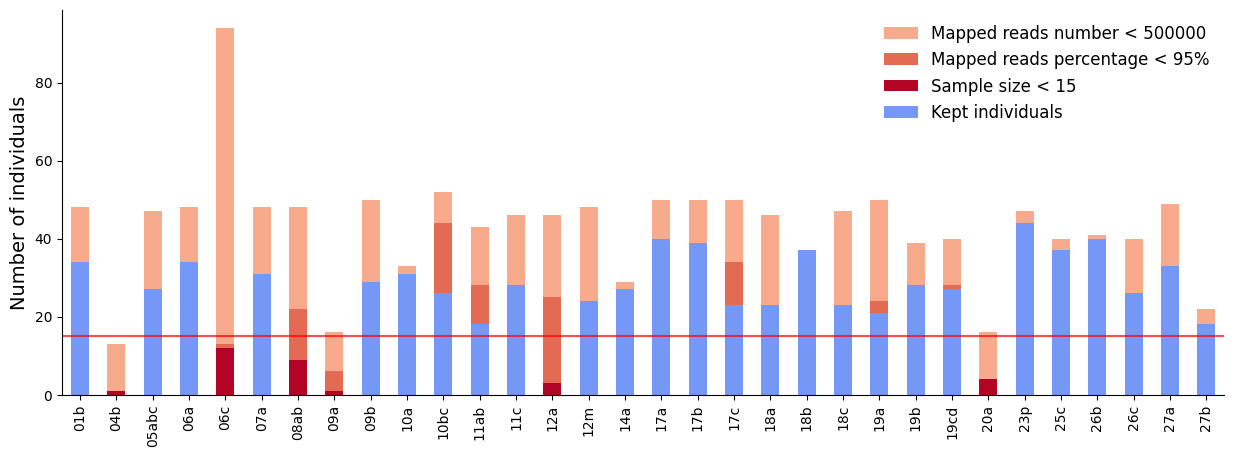

In [30]:
fig,ax=plt.subplots()
fig.set_size_inches(15,5)

cmap = blues_cm
mypal = [cmap(i / (18 - 1)) for i in range(18)]
BLUE=mypal[7]
cmap = reds_cm
mypal = [cmap(i / (4 - 1)) for i in range(4)]
mypal = [BLUE, mypal[3], mypal[2], mypal[1]]

population=[]
starting_individuals=[]
filt1a_removed=[]
filt1b_removed=[]
filt1_removed=[]
kept_individuals=[]
for pop in np.unique(df["pop"]):
    population.append(pop)
    start=len(df[df["pop"]==pop])
    starting_individuals.append(start)
    filt1a=len(df_filt1a[df_filt1a["pop"]==pop])
    filt1a_removed.append(start-filt1a)
    filt1b=len(df_filt1b[df_filt1b["pop"]==pop])
    filt1b_removed.append(filt1a-filt1b)
    filt1=len(df_filt1[df_filt1["pop"]==pop])
    filt1_removed.append(filt1b-filt1)
    kept_individuals.append(filt1)
d = {'Populations': population, 'Kept individuals': kept_individuals,
     'Sample size < 15': filt1_removed, 'Mapped reads percentage < 95%': filt1b_removed,
     'Mapped reads number < 500000': filt1a_removed}
ds = pd.DataFrame(data=d)

ds.plot(x="Populations",kind='bar',stacked=True,color=mypal, ax=ax)
ax.set_ylabel('Number of individuals',size=14)
ax.set_xlabel('',size=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', rotation=90)
ax.axhline(15, color="red", alpha=0.7)
handles, labels = ax.get_legend_handles_labels()
order = [3,2,1,0]  # Adjust order as needed
ax.legend([handles[i] for i in order], [labels[i] for i in order], loc="upper right", fontsize=12, edgecolor="white")

fig.savefig("SuppFig5.1.pdf", format="pdf")
fig.savefig("SuppFig5.1.png", format="png", dpi=500)

In [31]:
print(len(df)-len(df_filt1a))
print(len(df_filt1a)-len(df_filt1b))
print(len(df_filt1b)-len(df_filt1))
print(len(df_filt1))
print(len(np.unique(df_filt1["pop"])))

491
84
30
768
26


In [32]:
# Supplementary Figure 5.2

In [33]:
#filt2
#25 best individuals from each locality

df_filt1_imiss=pd.read_csv("filt1.imiss", sep='\t')
df_filt1_imiss=df_filt1_imiss[["INDV","F_MISS"]]
df_filt1_imiss["POP"]="01"
for i in range(0,len(df_filt1_imiss)):
    df_filt1_imiss["POP"][i]=df_filt1_imiss["INDV"][i].split("_")[0]
df_filt2_imiss=pd.DataFrame()
for i in np.unique(df_filt1_imiss["POP"]):
    tmp=df_filt1_imiss[df_filt1_imiss["POP"]==i]
    tmp=tmp.sort_values("F_MISS")
    df_filt2_imiss=pd.concat([df_filt2_imiss,tmp.head(25)])
df_filt2_imiss=df_filt2_imiss.reset_index(drop=True)
df_filt2=df_filt1[df_filt1['sample_prefix'].isin(df_filt2_imiss['INDV'])]
df_filt2

,sample_prefix,pop,total,secondary,supplementary,duplicates,mapped,mapped.perc,paired,read1,read2,properly_paired,properly_paired.perc,both_mapped,singletons,singletons.perc,different_chr,different_chr_mapQ>=5,reads_numb,LIBRARY
3,01b_06,01b,5517571,0,133423,0,5497835,99.64,5384148,2692074,2692074,5192560,96.44,5359274,5138,0.10,150152,127958,5384148,Library2
6,01b_10,01b,4089624,0,79002,0,4076468,99.68,4010622,2005311,2005311,3898360,97.20,3995090,2376,0.06,88822,73681,4010622,Library2
7,01b_12,01b,4049689,0,81143,0,4032299,99.57,3968546,1984273,1984273,3849926,97.01,3947098,4058,0.10,90120,75852,3968546,Library2
8,01b_14,01b,2320061,0,32417,0,2312707,99.68,2287644,1143822,1143822,2240146,97.92,2278888,1402,0.06,35410,27466,2287644,Library2
9,01b_16,01b,3779469,0,80319,0,3765134,99.62,3699150,1849575,1849575,3587620,96.98,3681168,3647,0.10,86304,72805,3699150,Library2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,27b_24,27b,1157545,0,12939,0,1154784,99.76,1144606,572303,572303,1129136,98.65,1140740,1105,0.10,9594,7251,1144606,Library4
764,27b_35,27b,3666104,0,57552,0,3659000,99.81,3608552,1804276,1804276,3543976,98.21,3598542,2906,0.08,48412,34900,3608552,Library4
765,27b_37,27b,2618867,0,49841,0,2607364,99.56,2569026,1284513,1284513,2503056,97.43,2554848,2675,0.10,46990,38598,2569026,Library4
766,27b_40,27b,1352869,0,19113,0,1342585,99.24,1333756,666878,666878,1303206,97.71,1322318,1154,0.09,16214,13280,1333756,Library4


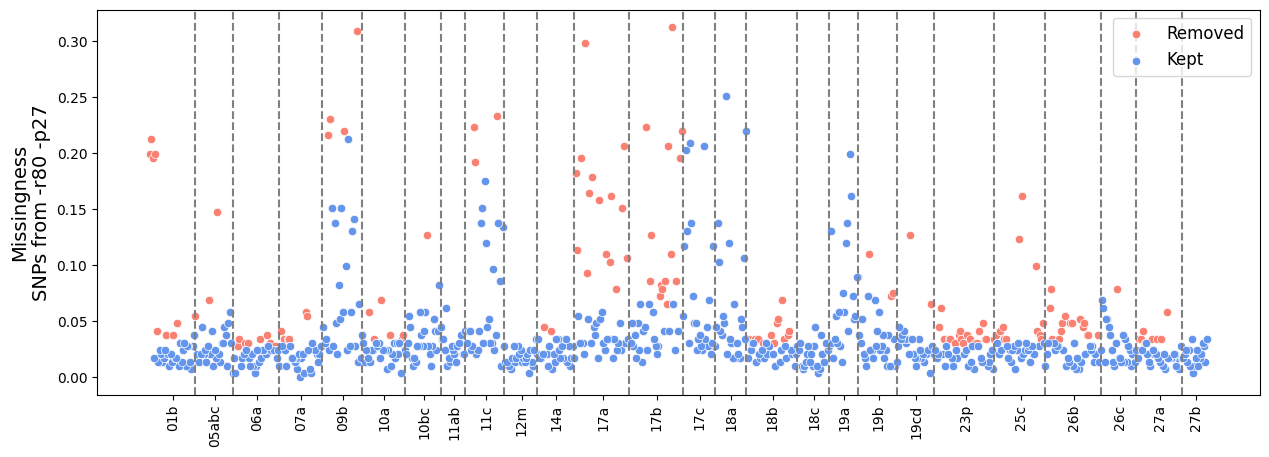

In [34]:
fig,ax=plt.subplots()
fig.set_size_inches(15,5)

sns.scatterplot(data=df_filt1_imiss,x="INDV",y="F_MISS",color="salmon",label="Removed",ax=ax)
sns.scatterplot(data=df_filt2_imiss,x="INDV",y="F_MISS",color="cornflowerblue",label="Kept",ax=ax)
ax.set_xlabel('',size=14)
ax.set_ylabel('Missingness\nSNPs from -r80 -p27',size=14)
ax.legend(loc="upper right", fontsize=12)
vline_pos=df_filt1_imiss.tail(1)["INDV"]
xtick_pos=df_filt1_imiss.iloc[[int(len(df_filt1_imiss)/2)]]["INDV"]
for i in np.unique(df_filt1_imiss["POP"]):
    tmp=df_filt1_imiss[df_filt1_imiss["POP"]==i]
    vline_pos = pd.concat([vline_pos, tmp.tail(1)["INDV"]])
    xtick_pos = pd.concat([xtick_pos, tmp.iloc[[int(len(tmp)/2)]]["INDV"]])
vline_pos=vline_pos[1:len(vline_pos)-1]
xtick_pos=xtick_pos[1:]
for i in vline_pos:
    ax.axvline(x=i, color='gray', linestyle='--')
    xtick_lab = np.unique(df_filt1_imiss["POP"])
    ax.set_xticks(xtick_pos, xtick_lab, rotation=90)
    
fig.savefig("SuppFig5.2.pdf", format="pdf")
fig.savefig("SuppFig5.2.png", format="png", dpi=500)

In [35]:
print(len(df_filt1)-len(df_filt2))
print(len(df_filt2))
print(len(np.unique(df_filt2["pop"])))

143
625
26


In [36]:
# Supplementary figure 5.3

In [37]:
#filt3
#imiss <= 0.10
IMISS_THRESH=0.10
#individual count per pop >=15

df_filt2_imiss=pd.read_csv("filt2.imiss", sep='\t')
df_filt2_imiss=df_filt2_imiss[["INDV","F_MISS"]]
df_filt2_imiss["POP"]="01"
for i in range(0,len(df_filt2_imiss)):
    df_filt2_imiss["POP"][i]=df_filt2_imiss["INDV"][i].split("_")[0]
df_filt3a_imiss=df_filt2_imiss[df_filt2_imiss["F_MISS"]<=IMISS_THRESH]
df_filt3a_imiss=df_filt3a_imiss.reset_index(drop=True)
df_filt3a=df_filt2[df_filt2['sample_prefix'].isin(df_filt3a_imiss['INDV'])]
df_filt3_imiss=df_filt3a_imiss[df_filt3a_imiss["POP"]!="19a"]
df_filt3_imiss=df_filt3_imiss.reset_index(drop=True)
df_filt3=df_filt2[df_filt2['sample_prefix'].isin(df_filt3_imiss['INDV'])]
df_filt3

,sample_prefix,pop,total,secondary,supplementary,duplicates,mapped,mapped.perc,paired,read1,read2,properly_paired,properly_paired.perc,both_mapped,singletons,singletons.perc,different_chr,different_chr_mapQ>=5,reads_numb,LIBRARY
3,01b_06,01b,5517571,0,133423,0,5497835,99.64,5384148,2692074,2692074,5192560,96.44,5359274,5138,0.10,150152,127958,5384148,Library2
6,01b_10,01b,4089624,0,79002,0,4076468,99.68,4010622,2005311,2005311,3898360,97.20,3995090,2376,0.06,88822,73681,4010622,Library2
7,01b_12,01b,4049689,0,81143,0,4032299,99.57,3968546,1984273,1984273,3849926,97.01,3947098,4058,0.10,90120,75852,3968546,Library2
8,01b_14,01b,2320061,0,32417,0,2312707,99.68,2287644,1143822,1143822,2240146,97.92,2278888,1402,0.06,35410,27466,2287644,Library2
9,01b_16,01b,3779469,0,80319,0,3765134,99.62,3699150,1849575,1849575,3587620,96.98,3681168,3647,0.10,86304,72805,3699150,Library2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,27b_24,27b,1157545,0,12939,0,1154784,99.76,1144606,572303,572303,1129136,98.65,1140740,1105,0.10,9594,7251,1144606,Library4
764,27b_35,27b,3666104,0,57552,0,3659000,99.81,3608552,1804276,1804276,3543976,98.21,3598542,2906,0.08,48412,34900,3608552,Library4
765,27b_37,27b,2618867,0,49841,0,2607364,99.56,2569026,1284513,1284513,2503056,97.43,2554848,2675,0.10,46990,38598,2569026,Library4
766,27b_40,27b,1352869,0,19113,0,1342585,99.24,1333756,666878,666878,1303206,97.71,1322318,1154,0.09,16214,13280,1333756,Library4


In [38]:
#filt4
#imiss <= 0.10
#individual count per pop >=15

df_filt3_imiss=pd.read_csv("filt3.imiss", sep='\t')
df_filt3_imiss=df_filt3_imiss[["INDV","F_MISS"]]
df_filt3_imiss["POP"]="01"
for i in range(0,len(df_filt3_imiss)):
    df_filt3_imiss["POP"][i]=df_filt3_imiss["INDV"][i].split("_")[0]
df_filt4a_imiss=df_filt3_imiss[df_filt3_imiss["F_MISS"]<=IMISS_THRESH]
df_filt4a_imiss=df_filt4a_imiss.reset_index(drop=True)
df_filt4a=df_filt3[df_filt3['sample_prefix'].isin(df_filt4a_imiss['INDV'])]
df_filt4_imiss=df_filt4a_imiss[df_filt4a_imiss["POP"]!="09b"]
df_filt4_imiss=df_filt4_imiss[df_filt4_imiss["POP"]!="11c"]
df_filt4_imiss=df_filt4_imiss[df_filt4_imiss["POP"]!="17c"]
df_filt4_imiss=df_filt4_imiss[df_filt4_imiss["POP"]!="18a"]
df_filt4_imiss=df_filt4_imiss.reset_index(drop=True)
df_filt4=df_filt3[df_filt3['sample_prefix'].isin(df_filt4_imiss['INDV'])]
df_filt4

,sample_prefix,pop,total,secondary,supplementary,duplicates,mapped,mapped.perc,paired,read1,read2,properly_paired,properly_paired.perc,both_mapped,singletons,singletons.perc,different_chr,different_chr_mapQ>=5,reads_numb,LIBRARY
3,01b_06,01b,5517571,0,133423,0,5497835,99.64,5384148,2692074,2692074,5192560,96.44,5359274,5138,0.10,150152,127958,5384148,Library2
6,01b_10,01b,4089624,0,79002,0,4076468,99.68,4010622,2005311,2005311,3898360,97.20,3995090,2376,0.06,88822,73681,4010622,Library2
7,01b_12,01b,4049689,0,81143,0,4032299,99.57,3968546,1984273,1984273,3849926,97.01,3947098,4058,0.10,90120,75852,3968546,Library2
8,01b_14,01b,2320061,0,32417,0,2312707,99.68,2287644,1143822,1143822,2240146,97.92,2278888,1402,0.06,35410,27466,2287644,Library2
9,01b_16,01b,3779469,0,80319,0,3765134,99.62,3699150,1849575,1849575,3587620,96.98,3681168,3647,0.10,86304,72805,3699150,Library2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,27b_24,27b,1157545,0,12939,0,1154784,99.76,1144606,572303,572303,1129136,98.65,1140740,1105,0.10,9594,7251,1144606,Library4
764,27b_35,27b,3666104,0,57552,0,3659000,99.81,3608552,1804276,1804276,3543976,98.21,3598542,2906,0.08,48412,34900,3608552,Library4
765,27b_37,27b,2618867,0,49841,0,2607364,99.56,2569026,1284513,1284513,2503056,97.43,2554848,2675,0.10,46990,38598,2569026,Library4
766,27b_40,27b,1352869,0,19113,0,1342585,99.24,1333756,666878,666878,1303206,97.71,1322318,1154,0.09,16214,13280,1333756,Library4


In [39]:
#filt5
#imiss <= 0.10
#individual count per pop >=15

df_filt4_imiss=pd.read_csv("filt4.imiss", sep='\t')
df_filt4_imiss=df_filt4_imiss[["INDV","F_MISS"]]
df_filt4_imiss["POP"]="01"
for i in range(0,len(df_filt4_imiss)):
    df_filt4_imiss["POP"][i]=df_filt4_imiss["INDV"][i].split("_")[0]
df_filt5a_imiss=df_filt4_imiss[df_filt4_imiss["F_MISS"]<=IMISS_THRESH]
df_filt5a_imiss=df_filt5a_imiss.reset_index(drop=True)
df_filt5a=df_filt4[df_filt4['sample_prefix'].isin(df_filt5a_imiss['INDV'])]
df_filt5_imiss=df_filt5a_imiss[df_filt5a_imiss["POP"]!="17a"]
df_filt5_imiss=df_filt5_imiss[df_filt5_imiss["POP"]!="17b"]
df_filt5_imiss=df_filt5_imiss[df_filt5_imiss["POP"]!="26c"]
df_filt5_imiss=df_filt5_imiss.reset_index(drop=True)
df_filt5=df_filt4[df_filt4['sample_prefix'].isin(df_filt5_imiss['INDV'])]
df_filt5

,sample_prefix,pop,total,secondary,supplementary,duplicates,mapped,mapped.perc,paired,read1,read2,properly_paired,properly_paired.perc,both_mapped,singletons,singletons.perc,different_chr,different_chr_mapQ>=5,reads_numb,LIBRARY
3,01b_06,01b,5517571,0,133423,0,5497835,99.64,5384148,2692074,2692074,5192560,96.44,5359274,5138,0.10,150152,127958,5384148,Library2
6,01b_10,01b,4089624,0,79002,0,4076468,99.68,4010622,2005311,2005311,3898360,97.20,3995090,2376,0.06,88822,73681,4010622,Library2
7,01b_12,01b,4049689,0,81143,0,4032299,99.57,3968546,1984273,1984273,3849926,97.01,3947098,4058,0.10,90120,75852,3968546,Library2
8,01b_14,01b,2320061,0,32417,0,2312707,99.68,2287644,1143822,1143822,2240146,97.92,2278888,1402,0.06,35410,27466,2287644,Library2
9,01b_16,01b,3779469,0,80319,0,3765134,99.62,3699150,1849575,1849575,3587620,96.98,3681168,3647,0.10,86304,72805,3699150,Library2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,27b_21,27b,1764692,0,21802,0,1761363,99.81,1742890,871445,871445,1719416,98.65,1738368,1193,0.07,17576,13368,1742890,Library4
762,27b_22,27b,1198955,0,15581,0,1196298,99.78,1183374,591687,591687,1164150,98.38,1179750,967,0.08,13720,8448,1183374,Library4
764,27b_35,27b,3666104,0,57552,0,3659000,99.81,3608552,1804276,1804276,3543976,98.21,3598542,2906,0.08,48412,34900,3608552,Library4
765,27b_37,27b,2618867,0,49841,0,2607364,99.56,2569026,1284513,1284513,2503056,97.43,2554848,2675,0.10,46990,38598,2569026,Library4


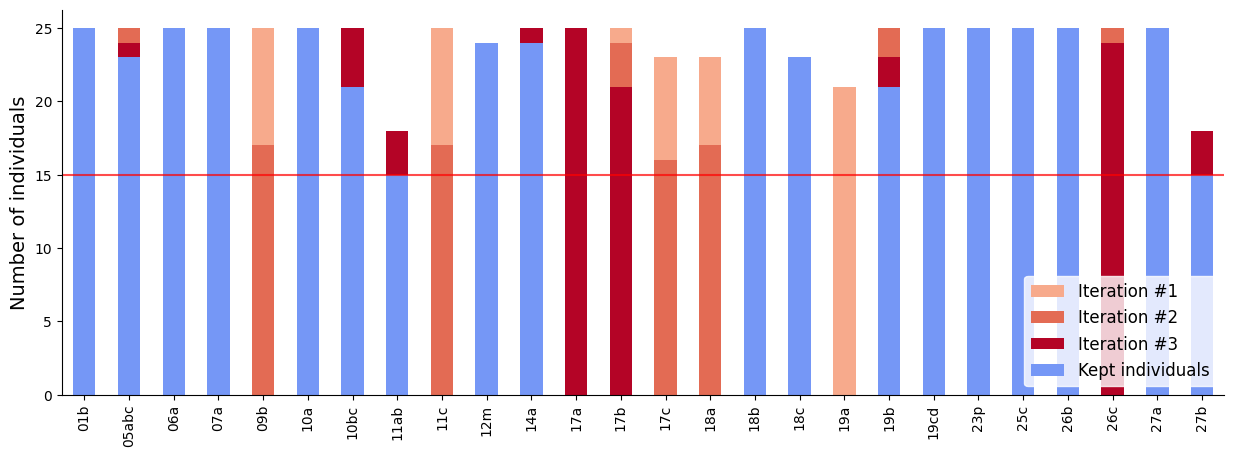

In [40]:
fig,ax=plt.subplots()
fig.set_size_inches(15,5)

cmap = blues_cm
mypal = [cmap(i / (18 - 1)) for i in range(18)]
BLUE=mypal[7]
cmap = reds_cm
mypal = [cmap(i / (4 - 1)) for i in range(4)]
mypal = [BLUE, mypal[3], mypal[2], mypal[1]]

population=[]
starting_individuals=[]
filt3_removed=[]
filt4_removed=[]
filt5_removed=[]
kept_individuals=[]
for pop in np.unique(df_filt2["pop"]):
    population.append(pop)
    start=len(df_filt2[df_filt2["pop"]==pop])
    starting_individuals.append(start)
    filt3=len(df_filt3[df_filt3["pop"]==pop])
    filt3_removed.append(start-filt3)
    filt4=len(df_filt4[df_filt4["pop"]==pop])
    filt4_removed.append(filt3-filt4)
    filt5=len(df_filt5[df_filt5["pop"]==pop])
    filt5_removed.append(filt4-filt5)
    kept_individuals.append(filt5)
d = {'Populations': population, 'Kept individuals': kept_individuals,
     'Iteration #3': filt5_removed, 'Iteration #2': filt4_removed,
     'Iteration #1': filt3_removed}
ds = pd.DataFrame(data=d)

ds.plot(x="Populations",kind='bar',stacked=True,color=mypal, ax=ax)
ax.set_ylabel('Number of individuals',size=14)
ax.set_xlabel('',size=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', rotation=90)
ax.axhline(15, color="red", alpha=0.7)
handles, labels = ax.get_legend_handles_labels()
order = [3,2,1,0]  # Adjust order as needed
ax.legend([handles[i] for i in order], [labels[i] for i in order], loc="lower right", fontsize=12, edgecolor="white")

fig.savefig("SuppFig5.3.pdf", format="pdf")
fig.savefig("SuppFig5.3.png", format="png", dpi=500)

In [41]:
print(len(df_filt2)-len(df_filt3))
print(len(np.unique(df_filt3["pop"])))
print(len(df_filt3)-len(df_filt4))
print(len(np.unique(df_filt4["pop"])))
print(len(df_filt4)-len(df_filt5))
print(len(np.unique(df_filt5["pop"])))
print(len(df_filt5))

51
25
74
21
84
18
416


In [42]:
# Supplementary Figure 5.8

In [43]:
#filt6
#20 random individuals per locality

#df_filt6_imiss=pd.DataFrame()
#for i in np.unique(df_filt5_imiss["POP"]):
#    tmp=df_filt5_imiss[df_filt5_imiss["POP"]==i]
#    if len(tmp)>=20:
#        tmp=tmp.sample(20)
#    df_filt6_imiss=pd.concat([df_filt6_imiss,tmp])
#df_filt6_imiss=df_filt6_imiss.reset_index(drop=True)
#df_filt6_imiss=df_filt6_imiss.sort_values("INDV")

popmap_filt6=pd.read_csv("popmap.filt6.tsv", sep='\t')
df_filt6_imiss=df_filt5_imiss[df_filt5_imiss['INDV'].isin(popmap_filt6['sample_prefix'])]
df_filt6=df_filt5[df_filt5['sample_prefix'].isin(df_filt6_imiss['INDV'])]
df_filt6

,sample_prefix,pop,total,secondary,supplementary,duplicates,mapped,mapped.perc,paired,read1,read2,properly_paired,properly_paired.perc,both_mapped,singletons,singletons.perc,different_chr,different_chr_mapQ>=5,reads_numb,LIBRARY
3,01b_06,01b,5517571,0,133423,0,5497835,99.64,5384148,2692074,2692074,5192560,96.44,5359274,5138,0.10,150152,127958,5384148,Library2
6,01b_10,01b,4089624,0,79002,0,4076468,99.68,4010622,2005311,2005311,3898360,97.20,3995090,2376,0.06,88822,73681,4010622,Library2
8,01b_14,01b,2320061,0,32417,0,2312707,99.68,2287644,1143822,1143822,2240146,97.92,2278888,1402,0.06,35410,27466,2287644,Library2
9,01b_16,01b,3779469,0,80319,0,3765134,99.62,3699150,1849575,1849575,3587620,96.98,3681168,3647,0.10,86304,72805,3699150,Library2
10,01b_17,01b,888862,0,18440,0,884629,99.52,870422,435211,435211,838912,96.38,865200,989,0.11,23776,20541,870422,Library2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,27b_21,27b,1764692,0,21802,0,1761363,99.81,1742890,871445,871445,1719416,98.65,1738368,1193,0.07,17576,13368,1742890,Library4
762,27b_22,27b,1198955,0,15581,0,1196298,99.78,1183374,591687,591687,1164150,98.38,1179750,967,0.08,13720,8448,1183374,Library4
764,27b_35,27b,3666104,0,57552,0,3659000,99.81,3608552,1804276,1804276,3543976,98.21,3598542,2906,0.08,48412,34900,3608552,Library4
765,27b_37,27b,2618867,0,49841,0,2607364,99.56,2569026,1284513,1284513,2503056,97.43,2554848,2675,0.10,46990,38598,2569026,Library4


In [44]:
df_filt6_imiss=pd.read_csv("filt6.imiss", sep='\t')
df_filt6_imiss=df_filt6_imiss[["INDV","F_MISS"]]
df_filt6_imiss["POP"]="01"
for i in range(0,len(df_filt6_imiss)):
    df_filt6_imiss["POP"][i]=df_filt6_imiss["INDV"][i].split("_")[0]
df_filt6_imiss = df_filt6_imiss.merge(LIBR[['IND', 'LIBRARY']], left_on='INDV', right_on='IND', how='left').drop(columns=['IND'])
df_filt6_imiss

,INDV,F_MISS,POP,LIBRARY
0,01b_06,0.033920,01b,Library2
1,01b_10,0.030151,01b,Library2
2,01b_14,0.021357,01b,Library2
3,01b_16,0.024497,01b,Library2
4,01b_17,0.041457,01b,Library2
...,...,...,...,...
345,27b_21,0.045226,27b,Library4
346,27b_22,0.097990,27b,Library4
347,27b_35,0.032035,27b,Library4
348,27b_37,0.020729,27b,Library4


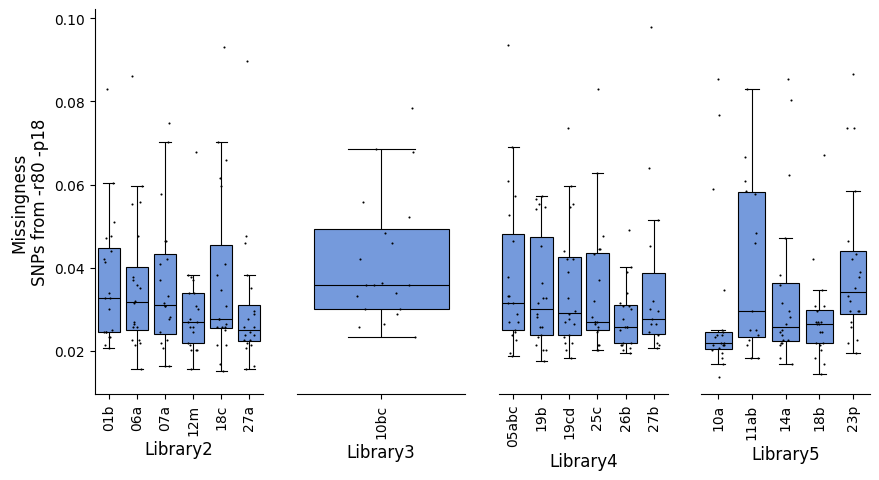

In [45]:
fig, ax = plt.subplots(1,4, sharey=True)
fig.set_size_inches(10, 5)

for counter, library in enumerate(["Library2", "Library3", "Library4", "Library5"]):
    tmp = df_filt6_imiss[df_filt6_imiss["LIBRARY"] == library]
    sns.boxplot(data=tmp, x="POP", y="F_MISS", color="cornflowerblue", linecolor="black", linewidth=0.8, showfliers=False, ax=ax[counter])
    sns.stripplot(data=tmp, x="POP", y="F_MISS", color="black", jitter=0.2, size=1.5, ax=ax[counter])
    ax[counter].set_xlabel(library, size=12)
    if counter == 0:
        ax[counter].set_ylabel('Missingness\nSNPs from -r80 -p18', size=12)
    else:
        ax[counter].set_ylabel('')  # Clear y-label for other subplots
        ax[counter].yaxis.set_visible(False)
        ax[counter].spines['left'].set_visible(False)

    ax[counter].tick_params(axis='x', rotation=90)
    ax[counter].spines['top'].set_visible(False)
    ax[counter].spines['right'].set_visible(False)

fig.savefig("SuppFig5.8.pdf", format="pdf")
fig.savefig("SuppFig5.8.png", format="png", dpi=500)

In [46]:
# Supplementary Figure 5.4

In [47]:
coord=pd.read_csv("coord.txt", sep='\t')
coord["GSA"]=coord["GSA"].astype(str)
coord["subGSA"]=coord["GSA"] + coord["subarea"]
tmp=["01b","04b","04c","05abc","06a","06c","07a","08ab","09a","09b","11ab","12a","14a","19cd","23p"]
counter=0
for i in ["1b","4b","4c","5a","6a","6c","7a","8ab","9a","9b","11b","12_","14_","19c","23a"]:
    coord["subGSA"]=coord["subGSA"].replace(i, tmp[counter])
    counter=counter+1
tmp=["0.362383333","0.3986","2.556233333","2.567883333","2.572","2.582983333"]
counter=0
for i in ["_0.362383333","_0.3986","_2.556233333","_2.567883333","_2.572","_2.582983333"]:
    coord["longitude_dec"]=coord["longitude_dec"].replace(i, tmp[counter])
    counter=counter+1
coord["latitude_dec"]=coord["latitude_dec"].astype(float)
coord["longitude_dec"]=coord["longitude_dec"].astype(float)
coord['samp_numb']=coord['code'].str.split('_').str[-1]
coord['sample']=coord['subGSA'] + "_" + coord['samp_numb'].astype(str)
coord=coord[["sample","subGSA","latitude_dec","longitude_dec"]]
coord=coord.sort_values(by='sample')
coord=coord.reset_index(drop=True)
coord

,sample,subGSA,latitude_dec,longitude_dec
0,01b_01,01b,36.77630,2.556233
1,01b_02,01b,36.77630,2.556233
2,01b_03,01b,36.77630,2.556233
3,01b_04,01b,36.76420,2.567883
4,01b_05,01b,36.76420,2.567883
...,...,...,...,...
2205,27b_50,27b,33.92082,35.077280
2206,27b_6,27b,33.92082,35.077280
2207,27b_7,27b,33.92082,35.077280
2208,27b_8,27b,33.92082,35.077280


NameError: name 'rem_coord' is not defined

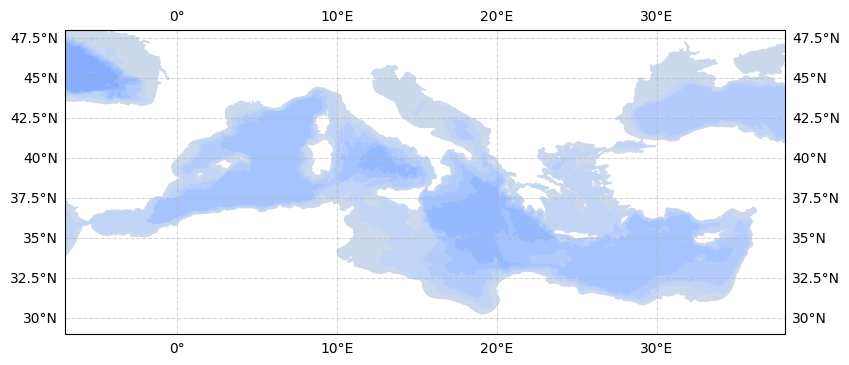

In [48]:
from glob import glob
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
import io
import zipfile
import requests
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from io import BytesIO
import matplotlib.image as mpimg

map_coord=[-7, 38, 29, 48]

def load_bathymetry(zip_file_url):
    """Read zip file from Natural Earth containing bathymetry shapefiles"""
    # Download and extract shapefiles
    r = requests.get(zip_file_url)
    z = zipfile.ZipFile(io.BytesIO(r.content))
    z.extractall("ne_10m_bathymetry_all/")

    # Read shapefiles, sorted by depth
    shp_dict = {}
    files = glob('ne_10m_bathymetry_all/*.shp')
    assert len(files) > 0
    files.sort()
    depths = []
    for f in files:
        depth = '-' + f.split('_')[-1].split('.')[0]  # depth from file name
        depths.append(depth)
        bbox = map_coord  # (x0, y0, x1, y1)
        nei = shpreader.Reader(f, bbox=bbox)
        shp_dict[depth] = nei
    depths = np.array(depths)[::-1]  # sort from surface to bottom
    return depths, shp_dict


if __name__ == "__main__":
    # Load data (14.8 MB file)
    depths_str, shp_dict = load_bathymetry(
        'https://naturalearth.s3.amazonaws.com/' +
        '10m_physical/ne_10m_bathymetry_all.zip')

    # Construct a discrete colormap with colors corresponding to each depth
    depths = depths_str.astype(int)
    N = len(depths)
    nudge = 0.01  # shift bin edge slightly to include data
    boundaries = [min(depths)] + sorted(depths+nudge)  # low to high
    norm = matplotlib.colors.BoundaryNorm(boundaries, N)
    blues_cm = blues_cm.resampled(N)
    colors_depths = blues_cm(norm(depths))
    
subplot_kw = {'projection': ccrs.PlateCarree()}
fig, ax = plt.subplots(subplot_kw=subplot_kw, figsize=(9, 7))
ax.set_extent(map_coord, crs=ccrs.PlateCarree())  # x0, x1, y0, y1
for i, depth_str in enumerate(depths_str):
    ax.add_geometries(shp_dict[depth_str].geometries(),
                        crs=ccrs.PlateCarree(),
                        color=colors_depths[i])
ax.coastlines(lw=0.0, resolution='50m')
ax.set_position([0.03, 0.05, 0.8, 0.9])

ax.gridlines(draw_labels=True, linestyle="--", alpha=0.5)

#for spine in ax.spines.values():
#    spine.set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

for subGSA, group in rem_coord.groupby('subGSA'):
    if subGSA == list(rem_coord['subGSA'].unique())[-1]:  # Check if it's the last group
        ax.plot(group["longitude_dec"], group["latitude_dec"], linestyle="none", marker='o', color=RED, alpha=0.8, markersize=5, transform=ccrs.PlateCarree(), label="Removed")
    else:
        ax.plot(group["longitude_dec"], group["latitude_dec"], linestyle="none", marker='o', color=RED, alpha=0.8, markersize=5, transform=ccrs.PlateCarree())
cmap = blues_cm
mypal = [cmap(i / (18 - 1)) for i in range(18)]
BLUE=mypal[3]
for subGSA, group in kept_coord.groupby('subGSA'):
    if subGSA == list(kept_coord['subGSA'].unique())[-1]:  # Check if it's the last group
        ax.plot(group["longitude_dec"], group["latitude_dec"], linestyle="none", marker='o', color=BLUE, alpha=0.8, markersize=5, transform=ccrs.PlateCarree(), label="Included in final dataset")
    else:
        ax.plot(group["longitude_dec"], group["latitude_dec"], linestyle="none", marker='o', color=BLUE, alpha=0.8, markersize=5, transform=ccrs.PlateCarree())
ax.legend(loc="lower left", fontsize=10)
fig.savefig("SuppFig5.4.pdf", format="pdf")
fig.savefig("SuppFig5.4.png", format="png", dpi=500)

In [ ]:
# Supplementary Figure 5.5

In [49]:
df_filt6

,sample_prefix,pop,total,secondary,supplementary,duplicates,mapped,mapped.perc,paired,read1,read2,properly_paired,properly_paired.perc,both_mapped,singletons,singletons.perc,different_chr,different_chr_mapQ>=5,reads_numb,LIBRARY
3,01b_06,01b,5517571,0,133423,0,5497835,99.64,5384148,2692074,2692074,5192560,96.44,5359274,5138,0.10,150152,127958,5384148,Library2
6,01b_10,01b,4089624,0,79002,0,4076468,99.68,4010622,2005311,2005311,3898360,97.20,3995090,2376,0.06,88822,73681,4010622,Library2
8,01b_14,01b,2320061,0,32417,0,2312707,99.68,2287644,1143822,1143822,2240146,97.92,2278888,1402,0.06,35410,27466,2287644,Library2
9,01b_16,01b,3779469,0,80319,0,3765134,99.62,3699150,1849575,1849575,3587620,96.98,3681168,3647,0.10,86304,72805,3699150,Library2
10,01b_17,01b,888862,0,18440,0,884629,99.52,870422,435211,435211,838912,96.38,865200,989,0.11,23776,20541,870422,Library2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,27b_21,27b,1764692,0,21802,0,1761363,99.81,1742890,871445,871445,1719416,98.65,1738368,1193,0.07,17576,13368,1742890,Library4
762,27b_22,27b,1198955,0,15581,0,1196298,99.78,1183374,591687,591687,1164150,98.38,1179750,967,0.08,13720,8448,1183374,Library4
764,27b_35,27b,3666104,0,57552,0,3659000,99.81,3608552,1804276,1804276,3543976,98.21,3598542,2906,0.08,48412,34900,3608552,Library4
765,27b_37,27b,2618867,0,49841,0,2607364,99.56,2569026,1284513,1284513,2503056,97.43,2554848,2675,0.10,46990,38598,2569026,Library4


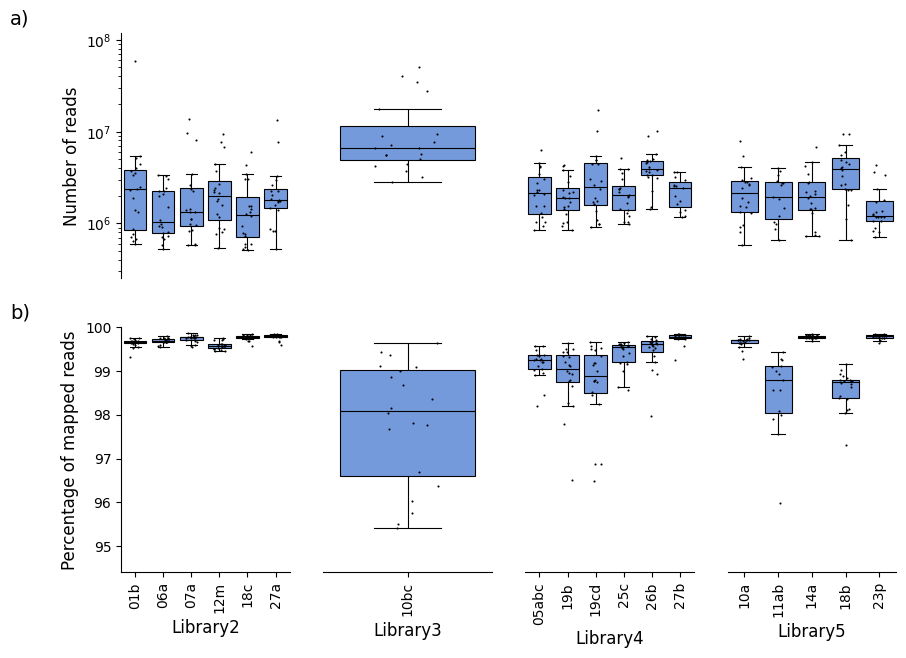

In [50]:
cmap = plt.get_cmap('Blues')
mypal = [cmap(i / (18 - 1)) for i in range(18)]

# Setup figure and axes
fig, ax = plt.subplots(2, 4, sharey=False)
fig.set_size_inches(10, 7)

for counter, library in enumerate(["Library2", "Library3", "Library4", "Library5"]):
    tmp = df_filt6[df_filt6["LIBRARY"] == library]
    sns.boxplot(data=tmp, x="pop", y="reads_numb", color="cornflowerblue", linecolor="black", linewidth=0.8, showfliers=False, ax=ax[0,counter])
    sns.stripplot(data=tmp, x="pop", y="reads_numb", color="black", jitter=0.2, size=1.5, ax=ax[0,counter])
    ax[0,counter].set_yscale("log")
    ax[0,counter].set_ylim(min(df_filt6["reads_numb"])/2, max(df_filt6["reads_numb"])*2)
    ax[0,counter].set_xlabel("", size=12)
    ax[0,counter].xaxis.set_visible(False)
    if counter == 0:
        ax[0,counter].set_ylabel('Number of reads', size=12)
        ax[0,counter].set_title("a)", x=-0.6, size=14)
    else:
        ax[0,counter].set_xlabel('')  # Clear y-label for other subplots
        ax[0,counter].xaxis.set_visible(False)
        ax[0,counter].set_ylabel('')  # Clear y-label for other subplots
        ax[0,counter].yaxis.set_visible(False)
        ax[0,counter].spines['left'].set_visible(False)
    ax[0,counter].spines['top'].set_visible(False)
    ax[0,counter].spines['right'].set_visible(False)
    ax[0,counter].spines['bottom'].set_visible(False)

for counter, library in enumerate(["Library2", "Library3", "Library4", "Library5"]):
    tmp = df_filt6[df_filt6["LIBRARY"] == library]
    sns.boxplot(data=tmp, x="pop", y="mapped.perc", color="cornflowerblue", linecolor="black", linewidth=0.8, showfliers=False, ax=ax[1,counter])
    sns.stripplot(data=tmp, x="pop", y="mapped.perc", color="black", jitter=0.2, size=1.5, ax=ax[1,counter])
    ax[1,counter].set_xlabel(library, size=12)
    ax[1,counter].set_ylim(min(df_filt6["mapped.perc"])-1.0, 100.0)
    if counter == 0:
        ax[1,counter].set_ylabel('Percentage of mapped reads', size=12)
        ax[1,counter].set_title("b)", x=-0.6, size=14)
    else:
        ax[1,counter].set_ylabel('')  # Clear y-label for other subplots
        ax[1,counter].yaxis.set_visible(False)
        ax[1,counter].spines['left'].set_visible(False)
    ax[1,counter].tick_params(axis='x', rotation=90)
    ax[1,counter].spines['top'].set_visible(False)
    ax[1,counter].spines['right'].set_visible(False)

fig.savefig("SuppFig5.5.pdf", format="pdf")
fig.savefig("SuppFig5.5.png", format="png", dpi=500)

In [51]:
# Supplementary Figure 5.6

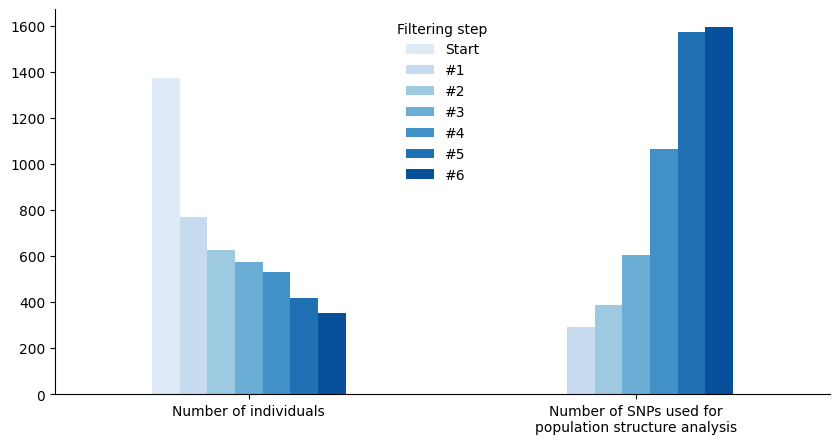

In [52]:
fig,ax=plt.subplots()
fig.set_size_inches(10,5)

stat=["Number of individuals","Number of SNPs used for\npopulation structure analysis"]
filt0=[1373,0]
filt1=[768,291]
filt2=[625,386]
filt3=[574,602]
filt4=[530,1065]
filt5=[416,1572]
filt6=[350,1592]
d = {'Stat': stat,'Start':filt0,'#1':filt1,'#2':filt2,'#3':filt3,'#4':filt4,'#5':filt5,'#6':filt6}
ds = pd.DataFrame(data=d)
sns.set_palette("Blues",len(ds.columns)-1)
ds.plot(x="Stat",kind='bar',stacked=False,ax=ax)
ax.set_ylabel('',size=12)
ax.set_xlabel('',size=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', rotation=0)
ax.legend(title="Filtering step", loc="upper center",fontsize=10,edgecolor="white")
fig.savefig("SuppFig5.6.pdf", format="pdf")
fig.savefig("SuppFig5.6.png", format="png", dpi=500)

In [53]:
# Supplementary Figure 5.7

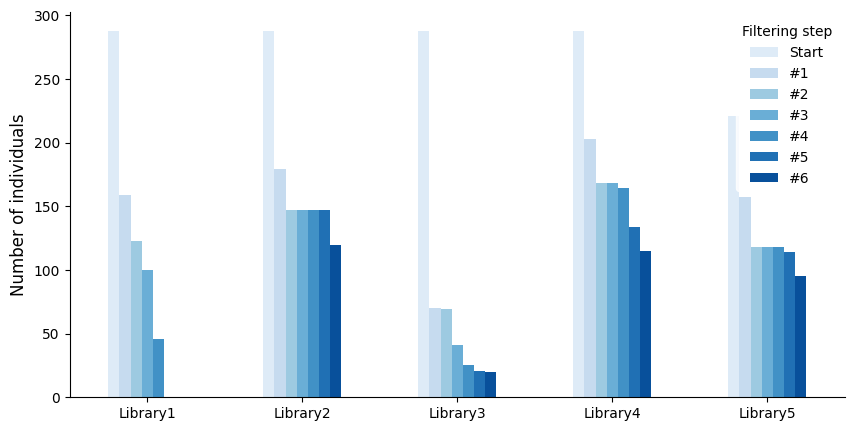

In [54]:
fig,ax=plt.subplots()
fig.set_size_inches(10,5)

library=[]
filt0=[]
filt1=[]
filt2=[]
filt3=[]
filt4=[]
filt5=[]
filt6=[]
for lib in np.unique(df["LIBRARY"]):
    library.append(lib)
    filt0.append(len(df[df["LIBRARY"]==lib]))
    filt1.append(len(df_filt1[df_filt1["LIBRARY"]==lib]))
    filt2.append(len(df_filt2[df_filt2["LIBRARY"]==lib]))
    filt3.append(len(df_filt3[df_filt3["LIBRARY"]==lib]))
    filt4.append(len(df_filt4[df_filt4["LIBRARY"]==lib]))
    filt5.append(len(df_filt5[df_filt5["LIBRARY"]==lib]))
    filt6.append(len(df_filt6[df_filt6["LIBRARY"]==lib]))
d = {'Libraries': library,'Start':filt0,'#1':filt1,'#2':filt2,'#3':filt3,'#4':filt4,'#5':filt5,'#6':filt6}
ds = pd.DataFrame(data=d)
sns.set_palette("Blues",len(ds.columns)-1)
ds.plot(x="Libraries",kind='bar',stacked=False,ax=ax)
ax.set_ylabel('Number of individuals',size=12)
ax.set_xlabel('',size=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', rotation=0)
ax.legend(title="Filtering step", loc="upper right",fontsize=10,edgecolor="white")
fig.savefig("SuppFig5.7.pdf", format="pdf")
fig.savefig("SuppFig5.7.png", format="png", dpi=500)

In [55]:
# Supplementary Figure 6.1

In [56]:
import re
def extract_and_convert_to_int(s):
    numerical_part = ''.join(re.findall(r'\d+', s))
    return int(numerical_part) if numerical_part else None
temp=[extract_and_convert_to_int(s) for s in kept_coord["subGSA"]]
macroarea=[]
for i in temp:
    if i<=7:
        macroarea.append("WWMED")
    else:
        if i<=11:
            macroarea.append("WCMED")
        else:
            if i<=21:
                if i in [17,18]:
                    macroarea.append("ADR")
                else:
                    macroarea.append("CMED")
            else:
                macroarea.append("EMED")
kept_coord["macroarea"]=macroarea

order = ['WWMED', 'WCMED', 'CMED', 'EMED', 'ADR']
kept_coord['macroarea'] = pd.Categorical(kept_coord['macroarea'], categories=order, ordered=True)
kept_coord_sorted = kept_coord.sort_values('macroarea')

NameError: name 'kept_coord' is not defined

In [ ]:
from glob import glob
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
import io
import zipfile
import requests
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from io import BytesIO
import matplotlib.image as mpimg

map_coord=[-7, 38, 29, 48]

def load_bathymetry(zip_file_url):
    """Read zip file from Natural Earth containing bathymetry shapefiles"""
    # Download and extract shapefiles
    r = requests.get(zip_file_url)
    z = zipfile.ZipFile(io.BytesIO(r.content))
    z.extractall("ne_10m_bathymetry_all/")

    # Read shapefiles, sorted by depth
    shp_dict = {}
    files = glob('ne_10m_bathymetry_all/*.shp')
    assert len(files) > 0
    files.sort()
    depths = []
    for f in files:
        depth = '-' + f.split('_')[-1].split('.')[0]  # depth from file name
        depths.append(depth)
        bbox = map_coord  # (x0, y0, x1, y1)
        nei = shpreader.Reader(f, bbox=bbox)
        shp_dict[depth] = nei
    depths = np.array(depths)[::-1]  # sort from surface to bottom
    return depths, shp_dict


if __name__ == "__main__":
    # Load data (14.8 MB file)
    depths_str, shp_dict = load_bathymetry(
        'https://naturalearth.s3.amazonaws.com/' +
        '10m_physical/ne_10m_bathymetry_all.zip')

    # Construct a discrete colormap with colors corresponding to each depth
    depths = depths_str.astype(int)
    N = len(depths)
    nudge = 0.01  # shift bin edge slightly to include data
    boundaries = [min(depths)] + sorted(depths+nudge)  # low to high
    norm = matplotlib.colors.BoundaryNorm(boundaries, N)
    blues_cm = blues_cm.resampled(N)
    colors_depths = blues_cm(norm(depths))
    
subplot_kw = {'projection': ccrs.PlateCarree()}
fig, ax = plt.subplots(subplot_kw=subplot_kw, figsize=(9, 7))
ax.set_extent(map_coord, crs=ccrs.PlateCarree())  # x0, x1, y0, y1
for i, depth_str in enumerate(depths_str):
    ax.add_geometries(shp_dict[depth_str].geometries(),
                        crs=ccrs.PlateCarree(),
                        color=colors_depths[i])
ax.coastlines(lw=0.0, resolution='50m')
ax.set_position([0.03, 0.05, 0.8, 0.9])

ax.gridlines(draw_labels=True, linestyle="--", alpha=0.5)

#for spine in ax.spines.values():
#    spine.set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

cmap = blues_cm
mypal = [cmap(i / (18 - 1)) for i in range(18)]
mypalette=[mypal[1], mypal[7], "yellow", RED, "green"]
mylab=["Western Med", "Western-Central Med", "Central Med", "Eastern Med", "Adriatic"]
counter=0
for macroarea, group in kept_coord.groupby('macroarea'):
    ax.plot(group["longitude_dec"], group["latitude_dec"], linestyle="none", marker='o', color=mypalette[counter], alpha=0.8, markersize=5, transform=ccrs.PlateCarree(), label=mylab[counter])
    counter=counter+1
ax.legend(loc="lower left", fontsize=10)
fig.savefig("SuppFig5.7.pdf", format="pdf")
fig.savefig("SuppFig5.7.png", format="png", dpi=500)

In [57]:
# Supplementary Figure 7.1

99.99999999999834


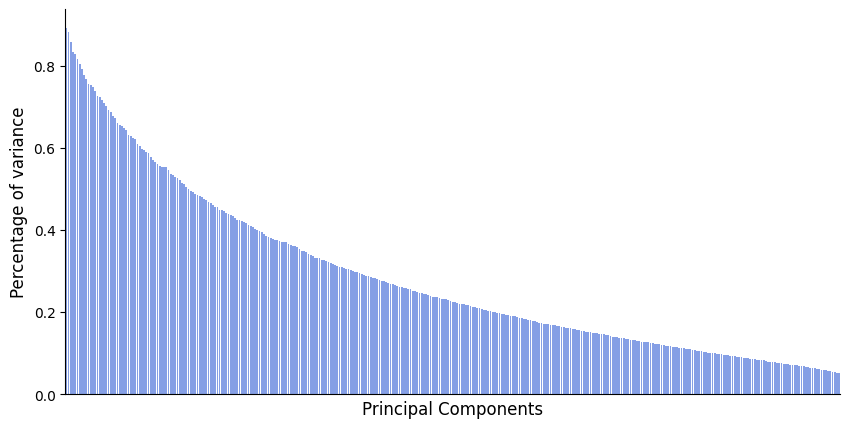

In [58]:
eig = pd.read_csv("PCA.eig.txt", header=0, sep='\t')
eig["x"] = eig["x"]*100
print(sum(eig["x"]))
eig["PC"] = range(1, len(eig) + 1)
fig,ax=plt.subplots()
fig.set_size_inches(10,5)
sns.barplot(data=eig, x="PC", y="x", color=BLUE)
ax.set_ylabel('Percentage of variance',size=12)
ax.set_xlabel('Principal Components',size=12)
ax.set_xticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', rotation=0)
fig.savefig("SuppFig7.1.pdf", format="pdf")
fig.savefig("SuppFig7.1.png", format="png", dpi=500)

In [59]:
# Supplementary Figure 7.2

In [60]:
evanno = pd.read_csv("evanno.txt", header=0, sep='\t')
evanno

,K,Reps,Mean LnP(K),Stdev LnP(K),Ln'(K),|Ln''(K)|,Delta K
0,1,10,-211810.90,1.4079,NaN,NaN,NaN
1,2,10,-211623.60,2.3523,187.30,61.85,26.293372
2,3,10,-211498.15,30.1333,125.45,22.69,0.752987
3,4,10,-211395.39,98.1197,102.76,107.29,1.093460
4,5,10,-211399.92,124.4872,-4.53,1027.65,8.255063
5,6,10,-212432.10,379.8401,-1032.18,68.08,0.179233
6,7,10,-213396.20,2185.7828,-964.10,3249.54,1.486671
7,8,10,-211110.76,734.5079,2285.44,1873.41,2.550565
8,9,10,-210698.73,527.2782,412.03,6.93,0.013143
9,10,10,-210279.77,484.5109,418.96,NaN,NaN


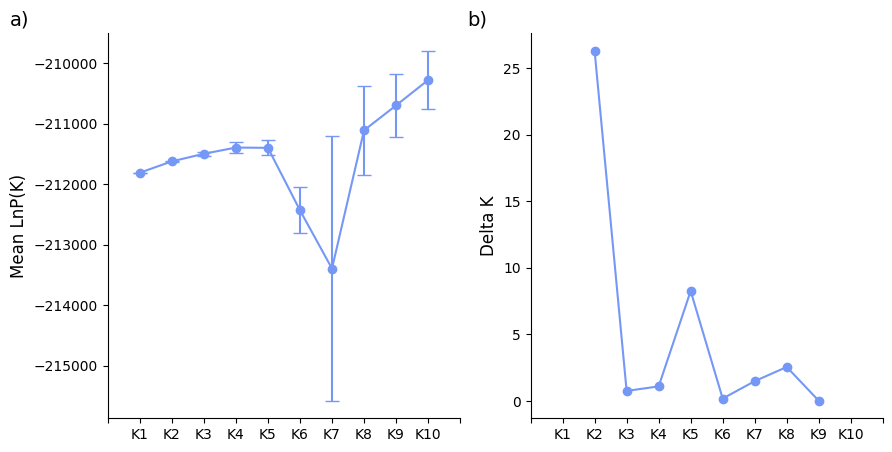

In [61]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(10, 5)
x_labels = [''] + [f'K{i}' for i in range(1, 11)] + ['']
ax[0].errorbar(evanno['K'], evanno['Mean LnP(K)'], yerr=evanno['Stdev LnP(K)'], color=BLUE, fmt='o-', capsize=5, label='Mean LnP(K)')
ax[0].set_ylabel("Mean LnP(K)", size=12, rotation=90)
ax[0].set_title("a)", x=-0.25, size=14)
ax[1].scatter(evanno['K'], evanno["Delta K"], color=BLUE, marker='o', label="Delta K")
ax[1].plot(evanno['K'], evanno["Delta K"], color=BLUE, linestyle='-')
ax[1].set_ylabel("Delta K", size=12, rotation=90)
ax[1].set_title("b)", x=-0.15, size=14)
for counter in [0,1]:
    ax[counter].set_xlabel("", size=10, rotation=0)
    ax[counter].set_xlim(0, 11)
    ax[counter].set_xticks(range(12))  # 0 to 11
    ax[counter].set_xticklabels(x_labels)
    ax[counter].spines['top'].set_visible(False)
    ax[counter].spines['right'].set_visible(False)

fig.savefig("SuppFig7.2.pdf", format="pdf")
fig.savefig("SuppFig7.2.png", format="png", dpi=500)

In [62]:
#Supplementary Figure 7.4

In [63]:
df=pd.read_csv("stampp_fst.tsv", sep='\t', index_col=0)
df_upper=df.transpose()
df_lower=pd.read_csv("stampp_fst.pvalues.tsv", sep='\t', index_col=0)
df=df_upper.fillna(df_lower)
df

,01b,05abc,06a,07a,10a,10bc,11ab,12m,14a,18b,18c,19b,19cd,23p,25c,26b,27a,27b
01b,NaN,-0.000546,-0.001780,-0.003281,-0.000036,-0.000672,0.000659,0.001399,-0.000960,0.002782,-0.001419,0.001963,-0.000120,-0.001369,-0.001667,-0.000094,0.000141,0.001357
05abc,0.64246,NaN,0.003868,0.000822,-0.001343,-0.001155,-0.000818,0.000288,-0.000290,0.000934,0.000140,-0.001165,0.001195,-0.001551,-0.001276,-0.000676,0.001542,-0.001400
06a,0.84765,0.032350,NaN,-0.000696,0.000741,0.001807,0.000945,0.002104,-0.000736,0.002769,-0.000527,0.000279,-0.000058,0.002191,-0.000972,0.001981,0.000529,0.002770
07a,0.97943,0.331550,0.659690,NaN,0.000729,0.001181,0.001129,0.001895,-0.000976,0.000973,-0.000877,-0.000073,0.000584,0.000753,0.000949,0.002255,0.001589,0.000051
10a,0.51769,0.804180,0.366340,0.339140,NaN,-0.001552,0.001150,-0.001356,-0.001515,0.003019,-0.001312,0.000503,0.000480,0.000055,-0.002321,0.000410,-0.000731,0.001989
10bc,0.65655,0.760030,0.191120,0.270400,0.819360,NaN,-0.001112,0.000087,-0.004378,0.003790,-0.001223,0.001274,0.000438,0.000390,-0.002045,0.000704,0.000440,0.003335
11ab,0.37884,0.675410,0.333620,0.298460,0.283200,0.712840,NaN,0.000569,-0.000899,0.002609,0.000769,0.000141,-0.002467,-0.002584,-0.002670,0.001418,0.002338,-0.001623
12m,0.22195,0.437400,0.142320,0.161060,0.811420,0.484500,0.399760,NaN,0.001238,0.001179,0.000265,0.004375,0.000796,0.002940,0.001204,0.002651,0.003845,0.003847
14a,0.72410,0.577710,0.675840,0.732060,0.819000,0.997950,0.697890,0.229630,NaN,-0.000115,-0.003495,-0.000038,0.000104,-0.001460,-0.001468,-0.000646,0.000158,0.000210
18b,0.06238,0.312160,0.058790,0.297680,0.060180,0.044530,0.097710,0.251470,0.534910,NaN,0.002356,0.002152,0.005143,0.003981,0.003985,0.004323,0.002934,0.004678


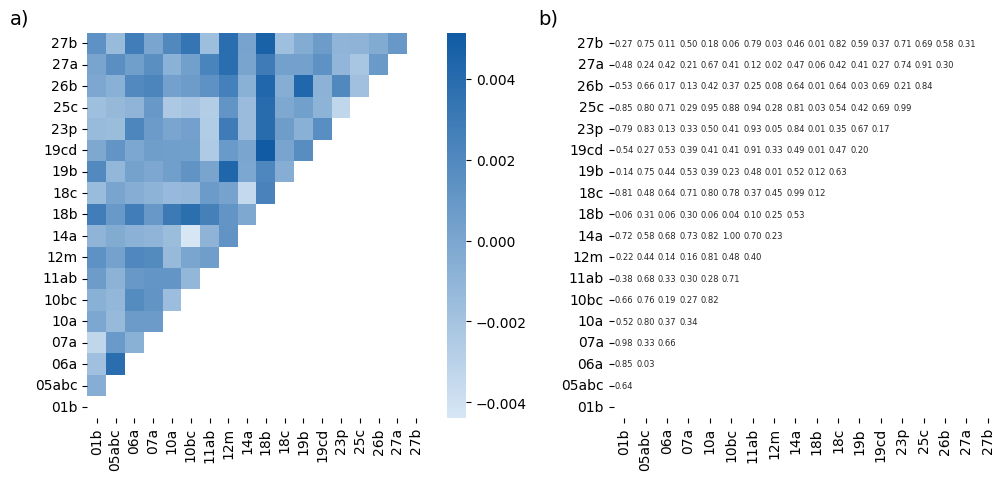

In [69]:
fig,ax=plt.subplots(1, 2)
fig.set_size_inches(12, 5)
df=pd.read_csv("stampp_fst.tsv", sep='\t', index_col=0)
bluepal=sns.color_palette("Blues",5)
bluecmap=LinearSegmentedColormap.from_list("Blues_cmap", [bluepal[0], bluepal[4]])
sns.heatmap(data=df, cmap=bluecmap, ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title("a)", x=-0.20, size=14)
df=pd.read_csv("stampp_fst.pvalues.tsv", sep='\t', index_col=0)
cmap = ListedColormap(['red', 'white'])
sns.heatmap(data=df, annot=True, square=True, cmap=cmap, linewidths=.5, fmt=".2f", vmin=0, vmax=0.000654, cbar=False, annot_kws={"size": 6}, ax=ax[1])
ax[1].invert_yaxis()
ax[1].set_title("b)", x=-0.17, size=14)
fig.savefig("SuppFig7.4.pdf", format="pdf")
fig.savefig("SuppFig7.4.png", format="png", dpi=500)

In [61]:
# Supplementary Figure 8.4

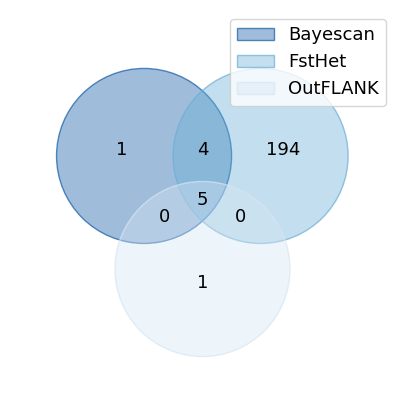

In [62]:
bluepal=sns.color_palette("Blues",5)
redpal=sns.color_palette("Reds",5)
PAL=[bluepal[4],bluepal[2],bluepal[0],redpal[3]]
i="maf01"

fig,ax=plt.subplots()
fig.set_size_inches(5,5)
bayescan=pd.read_csv("bayescan." + i + ".macroarea.prodds10_outliers.txt", header=None, sep='\t')
bayescan=set(bayescan[0])
fsthet=pd.read_csv("Fsthet." + i + ".macroarea_outliers.txt", header=None, sep='\t')
fsthet=set(fsthet[0])
outflank=pd.read_csv("OutFLANK." + i + ".macroarea_outliers.txt", header=None, sep='\t')
outflank=set(outflank[0])
sets = {'Bayescan': bayescan,
    'FstHet': fsthet,
    'OutFLANK': outflank}
venn(sets, cmap=PAL, legend_loc="upper right", ax=ax)
#ax.get_legend().remove()    
#ax.set_title(i, y=0.88, size=15)

fig.savefig("SuppFig8.4.pdf", format="pdf")
fig.savefig("SuppFig8.4.png", format="png", dpi=500)

In [63]:
# Supplementary Figure 8.5

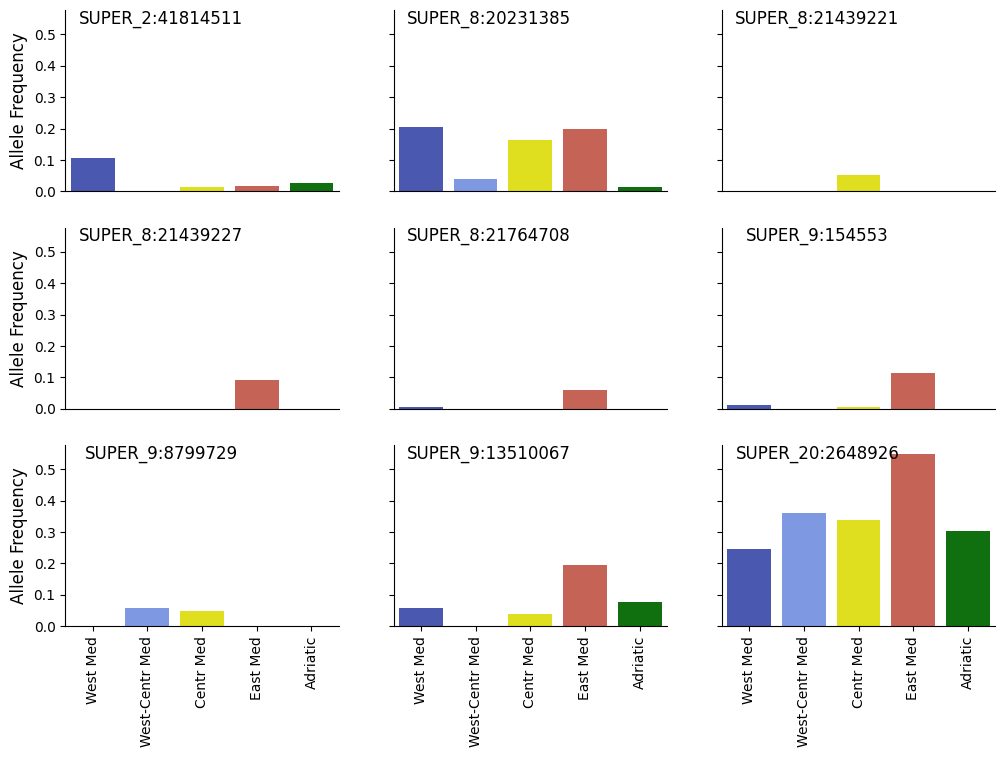

In [64]:
outliers=pd.read_csv("outliers.allfreq_macroarea.tsv", header=0, sep=' ')
custom_order = ['WestMed', 'WestCentrMed', 'CentrMed', 'EastMed', 'Adr']
outliers['POP'] = pd.Categorical(outliers['POP'], categories=custom_order, ordered=True)
outliers = outliers.sort_values(by='POP')
outliers = outliers.reset_index(drop=True)
column_order = [0,6,1,7,2,3,4,8,9,5]
outliers = outliers.iloc[:, column_order]
POP=["West Med", "West-Centr Med", "Centr Med", "East Med", "Adriatic"]

mypalette=[mypal[1], mypal[7], "yellow", RED, "green"]
fig,ax=plt.subplots(3, 3, sharey=True)
fig.set_size_inches(12, 8)

allele_columns=outliers.columns[1:4]
counter=0
for i in allele_columns:
    sns.barplot(x=outliers["POP"], y=outliers[i], palette=mypalette, ax=ax[0,counter])
    ax[0, counter].set_xlabel("", size=10, rotation=0)
    ax[0, counter].set_xticks([])
    ax[0, counter].set_xticklabels([])
    ax[0, counter].set_ylabel("Allele Frequency", size=12, rotation=90)
    ax[0, counter].spines['top'].set_visible(False)
    ax[0, counter].spines['right'].set_visible(False)
    ax[0, counter].set_title(i, size=12, x=0.35, y=0.88)
    counter=counter+1

allele_columns=outliers.columns[4:7]
counter=0
for i in allele_columns:
    sns.barplot(x=outliers["POP"], y=outliers[i], palette=mypalette, ax=ax[1,counter])
    ax[1, counter].set_xlabel("", size=10, rotation=0)
    ax[1, counter].set_xticks([])
    ax[1, counter].set_xticklabels([])
    ax[1, counter].set_ylabel("Allele Frequency", size=12, rotation=90)
    ax[1, counter].spines['top'].set_visible(False)
    ax[1, counter].spines['right'].set_visible(False)
    ax[1, counter].set_title(i, size=12, x=0.35, y=0.88)
    counter=counter+1

allele_columns=outliers.columns[7:10]
counter=0
for i in allele_columns:
    sns.barplot(x=outliers["POP"], y=outliers[i], palette=mypalette, ax=ax[2,counter])
    ax[2, counter].set_xlabel("", size=10, rotation=0)
    ax[2, counter].set_xticklabels(POP, size=10, rotation=90)
    ax[2, counter].set_ylabel("Allele Frequency", size=12, rotation=90)
    ax[2, counter].spines['top'].set_visible(False)
    ax[2, counter].spines['right'].set_visible(False)
    ax[2, counter].set_title(i, size=12, x=0.35, y=0.88)
    counter=counter+1
fig.savefig("SuppFig8.5.pdf", format="pdf")
fig.savefig("SuppFig8.5.png", format="png", dpi=500)

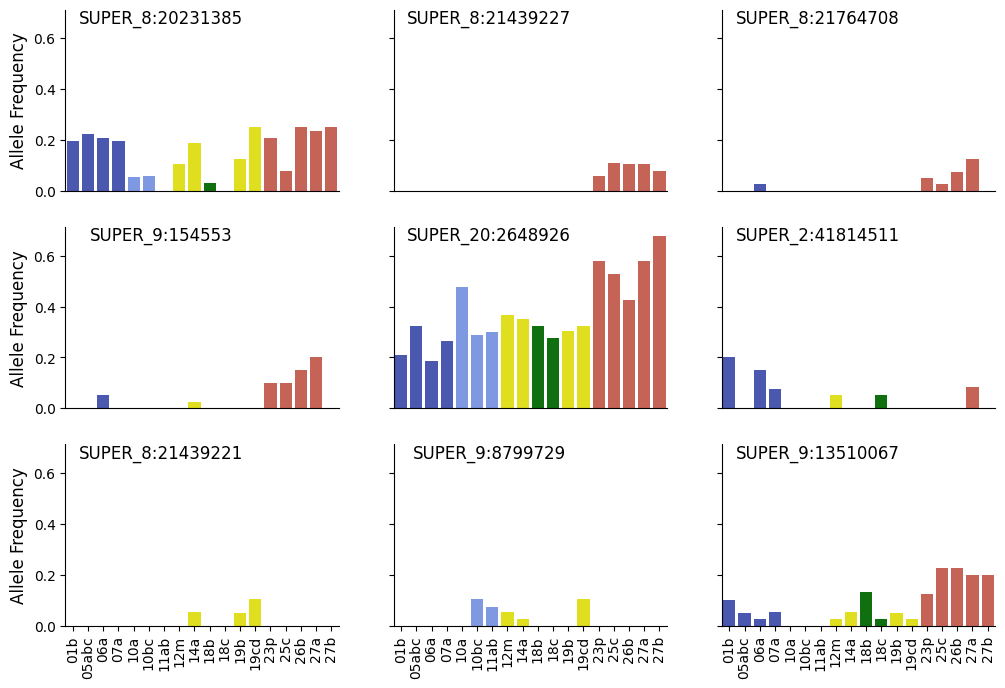

In [65]:
outliers=pd.read_csv("outliers.allfreq_loc.tsv", header=0, sep=' ')
POP=outliers["POP"].tolist()

mypalette=[mypal[1], mypal[1], mypal[1], mypal[1],
           mypal[7], mypal[7], mypal[7],
           "yellow", "yellow", "green", "green", "yellow", "yellow",
           RED, RED, RED, RED, RED]
fig,ax=plt.subplots(3, 3, sharey=True)
fig.set_size_inches(12, 8)

allele_columns=outliers.columns[1:4]
counter=0
for i in allele_columns:
    sns.barplot(x=outliers["POP"], y=outliers[i], palette=mypalette, ax=ax[0,counter])
    ax[0, counter].set_xlabel("", size=10, rotation=0)
    ax[0, counter].set_xticks([])
    ax[0, counter].set_xticklabels([])
    ax[0, counter].set_ylabel("Allele Frequency", size=12, rotation=90)
    ax[0, counter].spines['top'].set_visible(False)
    ax[0, counter].spines['right'].set_visible(False)
    ax[0, counter].set_title(i, size=12, x=0.35, y=0.88)
    counter=counter+1

allele_columns=outliers.columns[4:7]
counter=0
for i in allele_columns:
    sns.barplot(x=outliers["POP"], y=outliers[i], palette=mypalette, ax=ax[1,counter])
    ax[1, counter].set_xlabel("", size=10, rotation=0)
    ax[1, counter].set_xticks([])
    ax[1, counter].set_xticklabels([])
    ax[1, counter].set_ylabel("Allele Frequency", size=12, rotation=90)
    ax[1, counter].spines['top'].set_visible(False)
    ax[1, counter].spines['right'].set_visible(False)
    ax[1, counter].set_title(i, size=12, x=0.35, y=0.88)
    counter=counter+1

allele_columns=outliers.columns[7:10]
counter=0
for i in allele_columns:
    sns.barplot(x=outliers["POP"], y=outliers[i], palette=mypalette, ax=ax[2,counter])
    ax[2, counter].set_xlabel("", size=10, rotation=0)
    ax[2, counter].set_xticklabels(POP, size=10, rotation=90)
    ax[2, counter].set_ylabel("Allele Frequency", size=12, rotation=90)
    ax[2, counter].spines['top'].set_visible(False)
    ax[2, counter].spines['right'].set_visible(False)
    ax[2, counter].set_title(i, size=12, x=0.35, y=0.88)
    counter=counter+1
#fig.savefig("SuppFig8.5.pdf", format="pdf")
#fig.savefig("SuppFig8.5.png", format="png", dpi=500)